# AI For Business SPOC - AAA - Group 1 - Customer Segmentation (EDA & Clustering)


## 1 - Importing Libraries & Packages

### 1.1 Single Line Pip Install Statement for all libraries used in this notebook



```
pip install numpy pandas matplotlib seaborn scikit-learn plotly yellowbrick

```



### 1.2 Data Manipulation & Handling


In [1]:
import numpy as np
import pandas as pd

### 1.3 Charting/Plotting

In [2]:
import matplotlib
from matplotlib import colors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objs as go

### 1.4 Machine Learning

In [3]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
# import warnings
# if not sys.warnoptions:
#     warnings.simplefilter("ignore")
# np.random.seed(42)

### 1.5 Miscellaneous Packages/Libraries

In [4]:
from typing import List, Tuple, Set, Dict, Any, Optional
# from typing import int, float, str, bool ---> Already imported by default as they are basic data types, hence commented
import datetime as dt
import sys, os

## 2 - Custom Functions

### 2.1 addNewColumn()

In [5]:
def addNewColumn(data_frame, new_column_name, new_column_values):
    """
    Add a new column to an existing DataFrame.

    Parameters:
        data_frame (pd.DataFrame): The DataFrame to which the new column will be added.
        new_column_name (str): The name of the new column.
        new_column_values (list): The values for the new column. Must have the same length as the DataFrame.

    Returns:
        pd.DataFrame: The DataFrame with the new column added.
    """
    if len(new_column_values) != len(data_frame):
        raise ValueError("Length of new_column_values must be the same as the DataFrame's length.")

    data_frame[new_column_name] = new_column_values
    return data_frame


### 2.2 changeColumnOrder()

In [6]:
def changeOrderOfColumns(data_frame_name, column_to_be_moved, column_before, column_after):
    """
    Reposition a column in a DataFrame.

    Parameters:
        argument_1 : data_frame_name -> pandas dataframe, on which the operation needs to be carried out
        argument_2 : column_to_be_moved -> dataframe column that you wish to REPOSITION
        argument_3 : column_before -> the column that should appear BEFORE the column_to_be_moved in the final dataframe view
        argument_4 : column_after -> the column that should appear AFTER the column_to_be_moved in the final dataframe view

    Returns:
        pd.DataFrame : Pandas Dataframe

    """
    # Get the current order of columns
    existing_order_of_columns = list(data_frame_name.columns)

    # Ensure that the column_to_be_moved exists in the DataFrame
    if column_to_be_moved not in existing_order_of_columns:
        print(f"Column '{column_to_be_moved}' not found in the DataFrame.")
        print("Exiting..")
        return

    # Ensure that column_before and column_after are valid columns in the DataFrame
    if column_before not in existing_order_of_columns or column_after not in existing_order_of_columns:
        print(f"Column '{column_before}' or '{column_after}' not found in the DataFrame.")
        print("Exiting..")
        return

    # Re-order columns
    existing_order_of_columns.remove(column_to_be_moved)
    idx_after = existing_order_of_columns.index(column_after)
    existing_order_of_columns.insert(idx_after,column_to_be_moved)

    existing_order_of_columns.remove(column_before)
    idx_before = existing_order_of_columns.index(column_to_be_moved)
    existing_order_of_columns.insert(idx_before,column_before)

    new_order_of_columns=existing_order_of_columns

    # Reorder the DataFrame columns
    data_frame_name = data_frame_name[new_order_of_columns]

    return data_frame_name

### 2.3 checkNullValueColumns()

In [7]:
def checkNullValueColumns(data_frame_name):
    """
    Display information on columns that have null values.

    Parameters:
        data_frame (pd.DataFrame): The DataFrame for which we need the information.
        new_column_name (str): The name of the new column.
        new_column_values (list): The values for the new column. Must have the same length as the DataFrame.

    Returns:
        NoneType: No returned values
    """
    # Iterate through columns in the DataFrame
    counter = 1
    for column_name in data_frame_name.columns:
      column_data = data_frame_name[column_name]
      if column_data.isnull().sum() != 0:
        data_type = str(column_data.dtype)
        total_entries = len(column_data)

        null_entries = column_data.isnull().sum()
        non_null_entries = total_entries - null_entries

        print(f"{counter}. Column Name = \"{column_name}\", DataType = {data_type}, Total Entries = {total_entries}, "
              f"Null Entries (NaN) = {null_entries}, Non-Null Entries = {non_null_entries}")
        counter+=1

    if counter==1:
      print("No columns with null value found")
      print("using pandas.dataframe.info() function to display dataframe information")
      print()
      print()
      data_frame_name.info()

### 2.4 listDataFrameColumns()

In [8]:
def listDataFrameColumns(data_frame_name):
    """
    Display information on columns of a Pandas Data Frame.

    Parameters:
        data_frame (pd.DataFrame): The DataFrame for which we need the information.

    Returns:
        NoneType: No returned values. Only Prints Column names
    """

    temp = list(data_frame_name.columns)
    for i in range(0,len(temp)):
      print(f"Column Number = {i+1}, \t\t Column Name = {temp[i]}, \t\t\t Column Data Type = {data_frame_name[temp[0]].dtype}")

### Help with Custom Functions

Display function information from corressponding docstrings like this

```
help(changeOrderOfColumns)
print()
print()
help(addNewColumn)
```



## 3 - Loading the Dataset


### 3.1 Dataset Information


Dataset Link - https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv

*   **ID**: Customer's unique identifier
*   **Year_Birth**: Customer's birth year
*   **Education**: Customer's education level
*   **Marital_Status**: Customer's marital status
*   **Income**: Customer's yearly household income
*   **Kidhome**: Number of children in customer's household
*   **Teenhome**: Number of teenagers in customer's household
*   **Dt_Customer**: Date of customer's enrollment with the company
*   **Recency**: Number of days since customer's last purchase
*   **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise
*   **MntWines**: Amount spent on wine in last 2 years
*   **MntFruits**: Amount spent on fruits in last 2 years
*   **MntMeatProducts**: Amount spent on meat in last 2 years
*   **MntFishProducts**: Amount spent on fish in last 2 years
*   **MntSweetProducts**: Amount spent on sweets in last 2 years
*   **MntGoldProds**: Amount spent on gold in last 2 years
*   **NumDealsPurchases**: Number of purchases made with a discount
*   **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
*   **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 *   otherwise
*   **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
*   **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
*   **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
*   **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise
*   **NumWebPurchases**: Number of purchases made through the company’s website
*   **NumCatalogPurchases**: Number of purchases made using a catalogue
*   **NumStorePurchases**: Number of purchases made directly in stores
*   **NumWebVisitsMonth**: Number of visits to company’s website in the last month

Note - Z_Revenue & Z_CostContact columns have same values for all rows --- so will be dropped



### 3.2 Mount GDrive & Reading Dataset

In [9]:
## If using file on Google Drive

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/SPOC 2 - AI for Business/AAA - Group 1 Final Project/marketing_campaign.csv', sep="\t")

# df = pd.read_csv('/content/drive/MyDrive/SPOC 2 - AI for Business/AAA - Group 1 Final Project/marketing_campaign.csv', sep="\t")

## If using file on local system
# df = pd.read_csv('marketing_campaign.csv', sep="\t")


## If uploading on a per-session basis
# df = pd.read_csv("/content/marketing_campaign.csv", sep="\t") ## Tab separated values


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

## 4 - Data Cleaning

### 4.1 Dropping Z_CostContact & Z_Revenue

In [11]:
try:
  df = df.drop(['Z_CostContact','Z_Revenue'],axis = 1)
except:
  print("Either the column has already been dropped, or there is some error in code. Could not complete this operation. Please check")

In [12]:
pd.DataFrame(df.columns)

0
0                    ID
1            Year_Birth
2             Education
3        Marital_Status
4                Income
5               Kidhome
6              Teenhome
7           Dt_Customer
8               Recency
9              MntWines
10            MntFruits
11      MntMeatProducts
12      MntFishProducts
13     MntSweetProducts
14         MntGoldProds
15    NumDealsPurchases
16      NumWebPurchases
17  NumCatalogPurchases
18    NumStorePurchases
19    NumWebVisitsMonth
20         AcceptedCmp3
21         AcceptedCmp4
22         AcceptedCmp5
23         AcceptedCmp1
24         AcceptedCmp2
25             Complain
26             Response

### 4.2 Null Values Check

In [13]:
# help(checkNullValueColumns)
checkNullValueColumns(df) # Using custom function (Check Seciton-2) for details

1. Column Name = "Income", DataType = float64, Total Entries = 2240, Null Entries (NaN) = 24, Non-Null Entries = 2216


As can be seen here, there is only one column with null-values - the "INCOME" column. Only 24 out entries in total have null values. Since this is a very small number, we are removing it from the dataset


### 4.3 Dropping Null (NaN) Values

In [14]:
# Dropping null values since very few rows have null values
df = df.dropna()

### 4.4 Resetting Index

This is important as some rows have been deleted due to having Null Values (in the previous step)

In [15]:
df=df.reset_index(drop=True) #resetting index after dropping rows with null values
checkNullValueColumns(df)

No columns with null value found
using pandas.dataframe.info() function to display dataframe information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-n

In [16]:
df.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

## 5 - Feature Engineering

### 5.1 New Columns


### 5.1 Days Since Registered

This is to reflect how long an individual has been a customer for. <br>

1. We first find out when the last customer registration took place.
2. We then use some reference point (in this case reference = last customer registration date) in time to calculate the number of days a customer has been registered for.

In [17]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"]) #conversion into python datetime format
customer_enrollment_dates = []
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

<ipython-input-17-f30520f181bb>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"]) #conversion into python datetime format


In [18]:
for i in df["Dt_Customer"]:
    temp = i.date()
    # print(temp)
    customer_enrollment_dates.append(temp)
    # print(customer_enrollment_dates)
    # break

most_recent_customer_reg_date = max(customer_enrollment_dates)
# print(customer_enrollment_dates)
# print(most_recent_customer_reg_date)

#Dates of the newest and oldest recorded customer
print(f"Most recent customer = {most_recent_customer_reg_date}")
print(f"Oldest customer = {min(customer_enrollment_dates)}")

# df.head(3)

Most recent customer = 2014-12-06
Oldest customer = 2012-01-08


In [19]:
num_registered_days = []

for i in customer_enrollment_dates:
  # i=i.date
  temp = most_recent_customer_reg_date-i
  # print(i)
  # print(temp)
  # print(temp.days)
  # print(most_recent_customer_reg_date)
  temp2 = temp.days
  num_registered_days.append(temp2)
  # break

print(len(num_registered_days))
print(num_registered_days)

2216
[971, 125, 472, 65, 321, 453, 753, 488, 548, 268, 753, 386, 386, 787, 742, 712, 827, 618, 1000, 850, 553, 713, 35, 628, 673, 558, 554, 379, 198, 396, 787, 768, 654, 464, 340, 665, 34, 703, 586, 368, 712, 664, 161, 816, 561, 847, 1, 758, 673, 153, 365, 747, 670, 222, 278, 608, 880, 656, 395, 542, 564, 31, 262, 435, 489, 757, 629, 581, 220, 717, 831, 726, 606, 673, 829, 531, 639, 396, 284, 393, 508, 192, 1, 319, 258, 196, 198, 744, 397, 693, 534, 501, 251, 595, 568, 123, 420, 438, 672, 717, 877, 663, 786, 164, 673, 724, 423, 316, 655, 394, 387, 534, 285, 606, 593, 368, 656, 594, 122, 62, 432, 429, 65, 479, 629, 850, 517, 201, 496, 778, 387, 596, 465, 627, 779, 769, 465, 836, 168, 226, 156, 722, 1, 817, 655, 486, 362, 415, 473, 698, 939, 219, 700, 337, 388, 383, 465, 663, 284, 229, 511, 229, 310, 246, 727, 720, 197, 165, 693, 31, 62, 434, 318, 174, 938, 125, 666, 627, 651, 818, 568, 436, 555, 656, 342, 207, 443, 688, 250, 160, 450, 418, 1029, 507, 786, 481, 572, 122, 788, 615, 263, 9

In [20]:
# # df.info()

try:
  df = df.drop("Days_Since_Registered", axis=1)
except:
  print("Could not drop the mentioned column, please check the code and/or function arguments")


print(df.columns)
print()
print()


addNewColumn(df,"Days_Since_Registered",num_registered_days)
print(df.columns)

Could not drop the mentioned column, please check the code and/or function arguments
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
   

Days_Since_Registered column added at the last

### 5.2 Customer Age

Using 2017 as a year to caculate age

In [21]:
reference_yr = 2017
df["Customer_Age"]=reference_yr-df["Year_Birth"]
df["Customer_Age"].describe()

count    2216.000000
mean       48.179603
std        11.985554
min        21.000000
25%        40.000000
50%        47.000000
75%        58.000000
max       124.000000
Name: Customer_Age, dtype: float64

In [22]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Days_Since_Registered',
       'Customer_Age'],
      dtype='object')

### 5.3 Total Children

In [23]:
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]
print(df["Total_Children"].value_counts())
df.head(5)

1    1117
0     633
2     416
3      50
Name: Total_Children, dtype: int64


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-04-09       58       635  ...             0             0   
1  2014-08-03       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   
3  2014-10-02       26        11  ...             0             0   
4  2014-01-19       94       173  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0         0         1   
1             0             0             0         0         0   
2             0             0             0         0         0   
3             0             0             0         0         0   
4             0             0             0         0         0   

   Days_Since_Registered  Customer_Age  Total_Children  
0                    971            60               0  
1                    125            63               2  
2                    472            52               0  
3                     65            33               1  
4                    321            36               1  

[5 rows x 30 columns]

### 5.4 Relationship Status

In [24]:
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [25]:
df["Relationship_Status"] = df["Marital_Status"]
df["Relationship_Status"]=df["Relationship_Status"].replace({"Married":"Partner","Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
print(df["Relationship_Status"].value_counts())
df.head(3)

Partner    1430
Alone       786
Name: Relationship_Status, dtype: int64


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-04-09       58       635  ...             0             0   
1  2014-08-03       38        11  ...             0             0   
2  2013-08-21       26       426  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Days_Since_Registered  \
0             0             0         0         1                    971   
1             0             0         0         0                    125   
2             0             0         0         0                    472   

   Customer_Age  Total_Children  Relationship_Status  
0            60               0                Alone  
1            63               2                Alone  
2            52               0              Partner  

[3 rows x 31 columns]

#### Relationship Status Numerical (No Longer Used/Excluded)

No longer using this, as label encoding is used later

In [26]:
# df["Relationship_Status_Numerical"] = df["Relationship_Status"]
# df["Relationship_Status_Numerical"]=df["Relationship_Status_Numerical"].replace({"Partner":2, "Alone":1})
# print(df["Relationship_Status_Numerical"].value_counts())
# df.head(5)

### 5.5 Total Number of People in the Family

In [27]:
# df["Total_Family_Members"] = df["Total_Children"] + df["Relationship_Status_Numerical"]
# print(df["Total_Family_Members"].value_counts())
# df.head(1)


df["Total_Family_Members"] = df.apply(lambda row: 1 if row["Relationship_Status"] == "Alone" else 2 + row["Total_Children"], axis=1)
print(df["Total_Family_Members"].value_counts())
print(df.columns)
df.head(1)



1    786
3    741
2    381
4    277
5     31
Name: Total_Family_Members, dtype: int64
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Days_Since_Registered',
       'Customer_Age', 'Total_Children', 'Relationship_Status',
       'Total_Family_Members'],
      dtype='object')


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp5  AcceptedCmp1  \
0  2012-04-09       58       635  ...             0             0   

   AcceptedCmp2  Complain  Response  Days_Since_Registered  Customer_Age  \
0             0         0         1                    971            60   

   Total_Children  Relationship_Status  Total_Family_Members  
0               0                Alone                     1  

[1 rows x 32 columns]

### 5.6 Total Money Spent

In [28]:
df["Total_Money_Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","Total_Money_Spent"]].head(2)
# df["MntGoldProds","Total_Money_Spent"]
# df.head(5)

MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   

   MntGoldProds  Total_Money_Spent  
0            88               1617  
1             6                 27

### 5.7 Parenthood

In [29]:
df["Parenthood"] = df['Total_Children'].apply(lambda x: 1 if x > 0 else 0)
print(df.columns)
print()
print()
df.head(5)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Days_Since_Registered',
       'Customer_Age', 'Total_Children', 'Relationship_Status',
       'Total_Family_Members', 'Total_Money_Spent', 'Parenthood'],
      dtype='object')




ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp2  Complain  Response  \
0  2012-04-09       58       635  ...             0         0         1   
1  2014-08-03       38        11  ...             0         0         0   
2  2013-08-21       26       426  ...             0         0         0   
3  2014-10-02       26        11  ...             0         0         0   
4  2014-01-19       94       173  ...             0         0         0   

   Days_Since_Registered  Customer_Age  Total_Children  Relationship_Status  \
0                    971            60               0                Alone   
1                    125            63               2                Alone   
2                    472            52               0              Partner   
3                     65            33               1              Partner   
4                    321            36               1              Partner   

   Total_Family_Members  Total_Money_Spent  Parenthood  
0                     1               1617           0  
1                     1                 27           1  
2                     2                776           0  
3                     3                 53           1  
4                     3                422           1  

[5 rows x 34 columns]

## 6 - Final Checks to Obtain an Updated DataFrame

### 6.1 Dropping some redundant features

In [30]:
df.columns

# Output will look like this before eliminating any features
# Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
#        'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
#        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
#        'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
#        'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
#        'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
#        'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
#        'Days_Since_Registered', 'Customer_Age', 'Total_Children',
#        'Relationship_Status', 'Relationship_Status_Numerical',
#        'Total_Family_Members', 'Total_Money_Spent', 'Parenthood'],
#       dtype='object')

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Days_Since_Registered',
       'Customer_Age', 'Total_Children', 'Relationship_Status',
       'Total_Family_Members', 'Total_Money_Spent', 'Parenthood'],
      dtype='object')

Columns that will be dropped -


*   **Marital_Status** - Information contained is now represented by *Relationship_Status*
*   **Dt_Customer** - Information contained is now represented by *Days_Since_Registered*
*   **Year_Birth** - Information contained is now represented by *Customer_Age*
*   **Marital_Status** - Information contained is now represented by *Relationship_Status*
*   **ID** - Information not actually used since we are just doing EDA & Clustering


In [31]:
try:
  df = df.drop(["Marital_Status", "Dt_Customer", "Year_Birth", "ID"], axis=1)
except:
  print("Can't complete operation, one or more columns mentioned have either been already dropped or do not exist in dataset")

print(df.columns)
print()
df.head(2)

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Days_Since_Registered',
       'Customer_Age', 'Total_Children', 'Relationship_Status',
       'Total_Family_Members', 'Total_Money_Spent', 'Parenthood'],
      dtype='object')



Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  Graduation  58138.0        0         0       58       635         88   
1  Graduation  46344.0        1         1       38        11          1   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   

   Complain  Response  Days_Since_Registered  Customer_Age  Total_Children  \
0         0         1                    971            60               0   
1         0         0                    125            63               2   

   Relationship_Status  Total_Family_Members  Total_Money_Spent  Parenthood  
0                Alone                     1               1617           0  
1                Alone                     1                 27           1  

[2 rows x 30 columns]

### 6.2 Correlation Heatmap

<ipython-input-32-e4ffeaf54fd5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

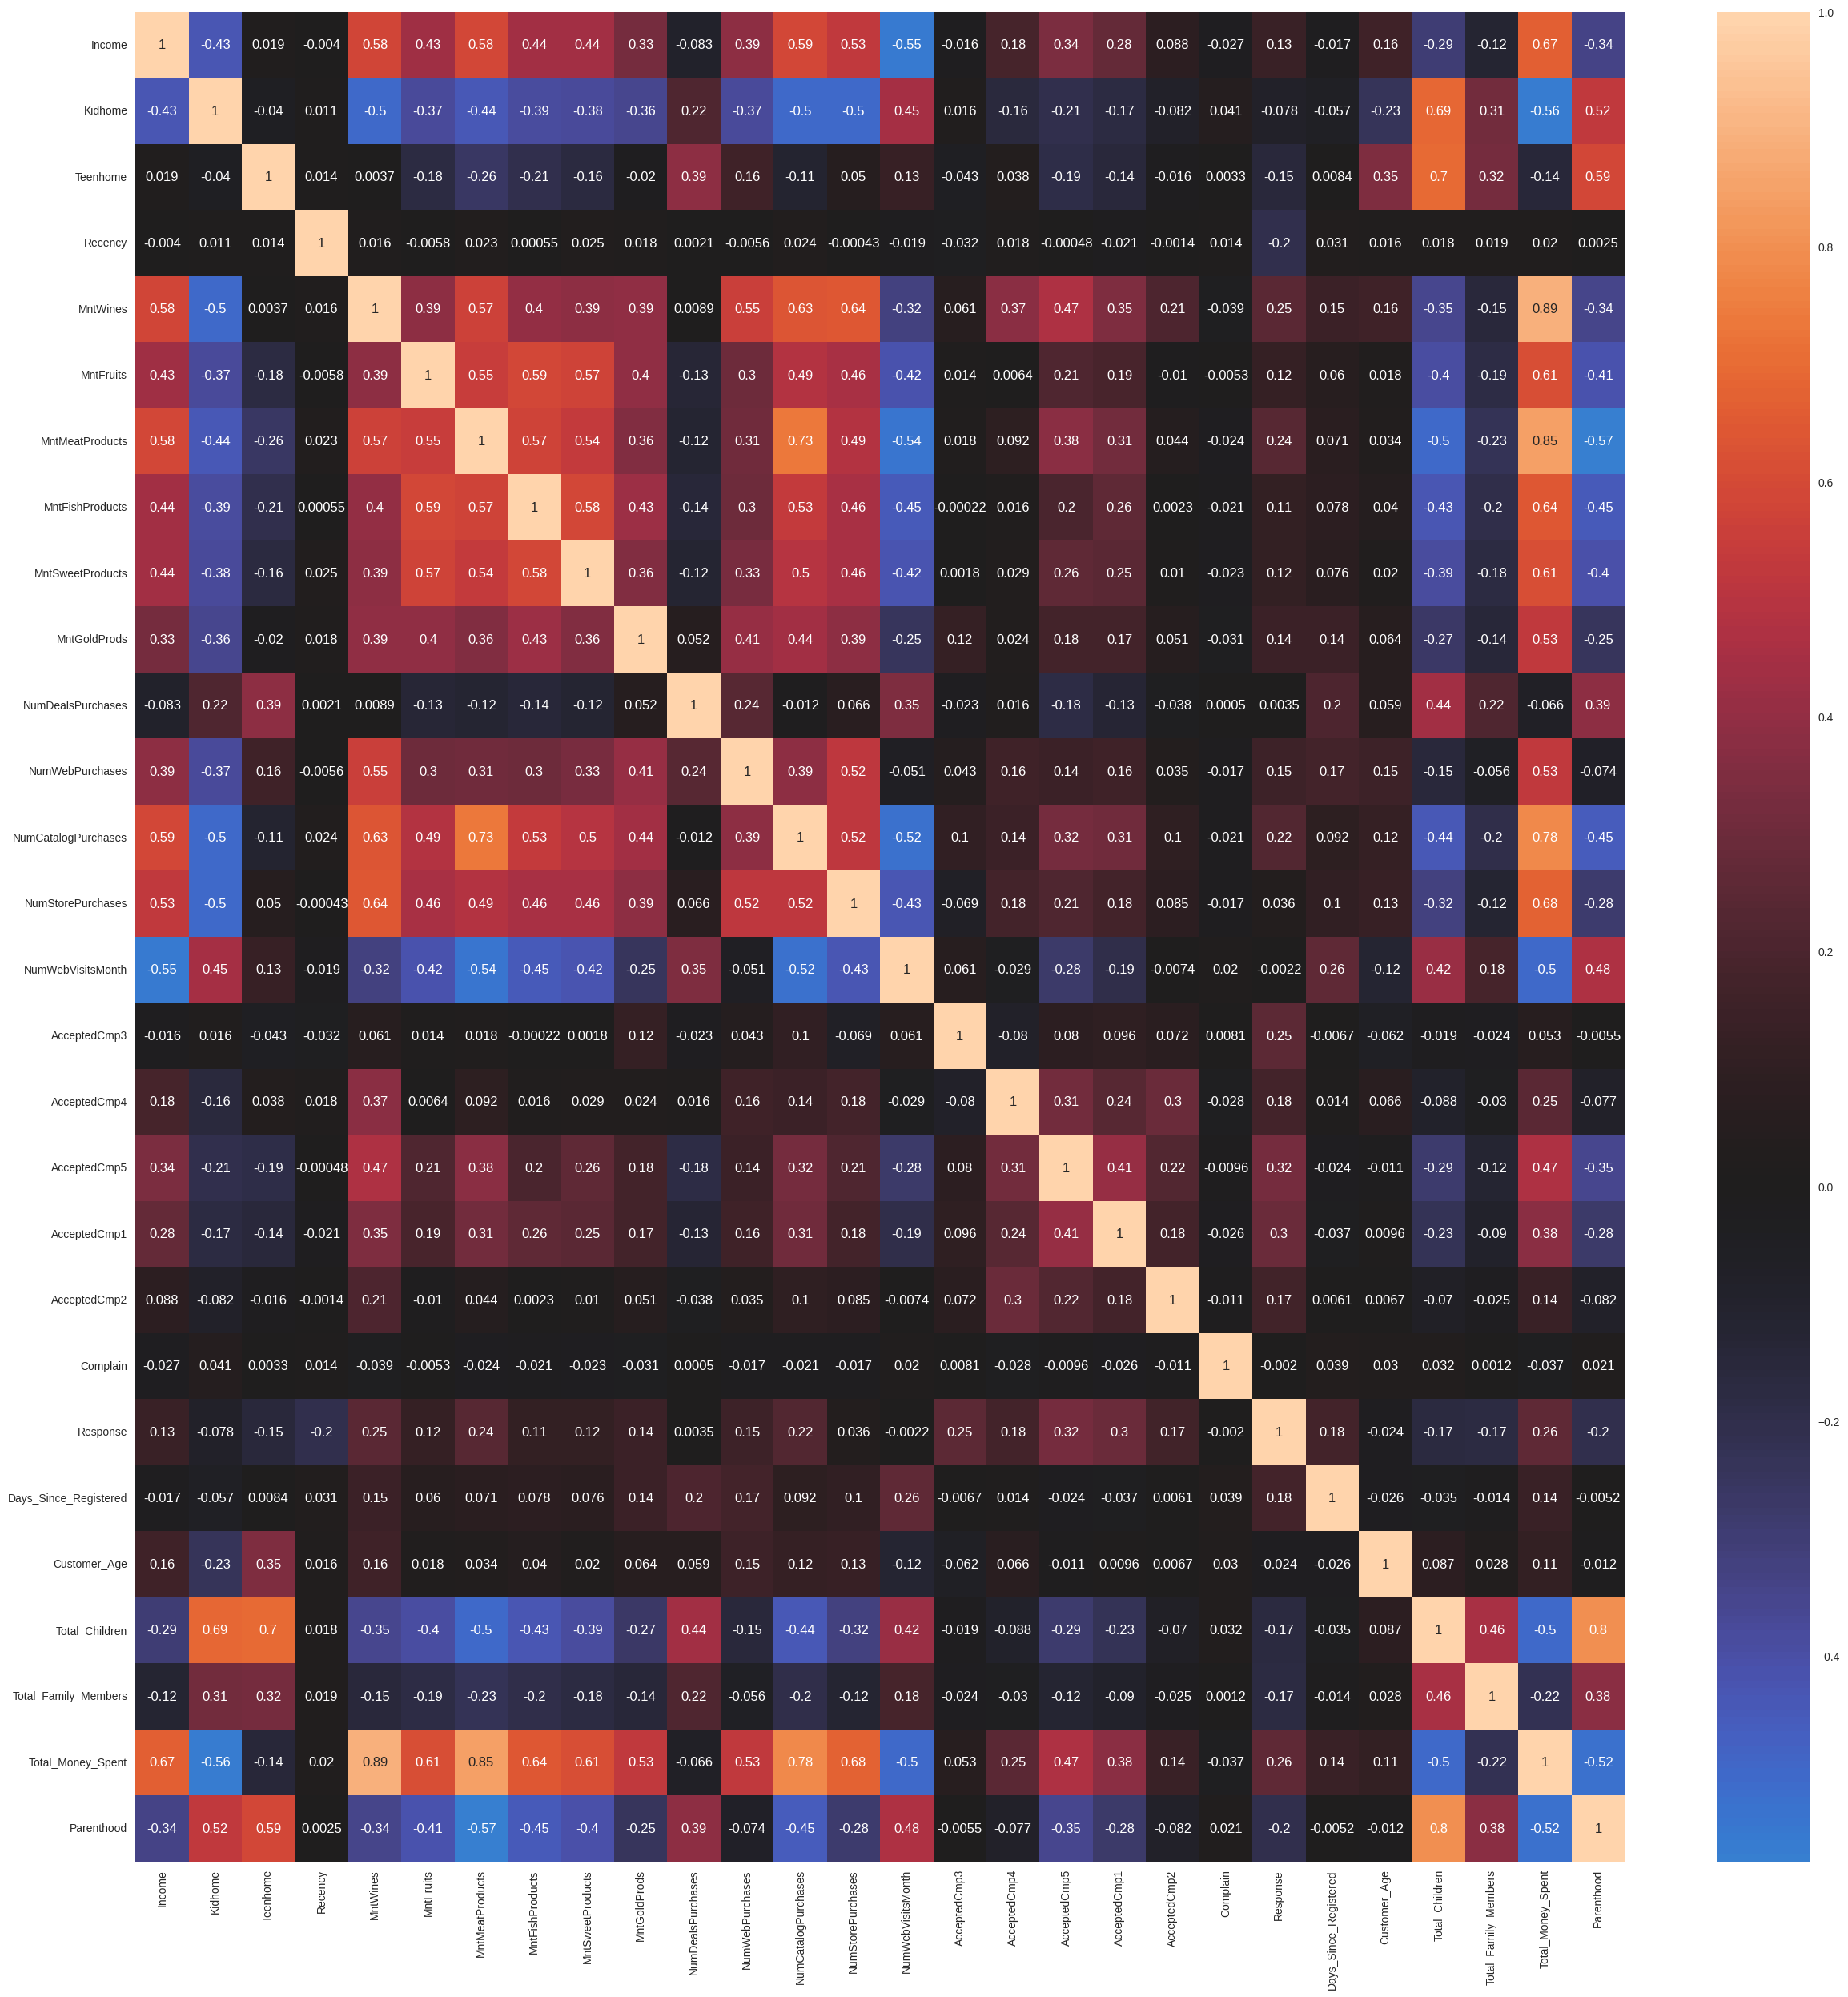

In [32]:
# corrmat= df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome','Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','Days_Since_Registered', 'Customer_Age', 'Total_Children','Relationship_Status', 'Relationship_Status_Numerical','Total_Family_Members', 'Total_Money_Spent', 'Parenthood']].corr()
corrmat = df.corr()
plt.figure(figsize=(30,30))
# sns.heatmap(corrmat,annot=True, center=0)
corrmat.style.background_gradient(cmap='viridis', axis=None)
sns.heatmap(corrmat,annot=True, center=0)

Some features like TotalFamilyMembers, TotalChildren,Parenthood are highly correlated. And Marital Status & Relationship Status are the same as well.

### 6.3 Updated DataFrame Description

In [33]:
df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2216.000000      2216.000000      2216.000000       2216.000000   
mean     26.356047       166.995939        37.637635         27.028881   
std      39.793917       224.283273        54.752082         41.072046   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.250000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  AcceptedCmp1  AcceptedCmp2     Complain  \
count   2216.000000  ...   2216.000000   2216.000000  2216.000000   
mean      43.965253  ...      0.064079      0.013538     0.009477   
std       51.815414  ...      0.244950      0.115588     0.096907   
min        0.000000  ...      0.000000      0.000000     0.000000   
25%        9.000000  ...      0.000000      0.000000     0.000000   
50%       24.500000  ...      0.000000      0.000000     0.000000   
75%       56.000000  ...      0.000000      0.000000     0.000000   
max      321.000000  ...      1.000000      1.000000     1.000000   

          Response  Days_Since_Registered  Customer_Age  Total_Children  \
count  2216.000000            2216.000000   2216.000000     2216.000000   
mean      0.150271             512.006318     48.179603        0.947202   
std       0.357417             232.469034     11.985554        0.749062   
min       0.000000               0.000000     21.000000        0.000000   
25%       0.000000             340.000000     40.000000        0.000000   
50%       0.000000             513.000000     47.000000        1.000000   
75%       0.000000             686.000000     58.000000        1.000000   
max       1.000000            1063.000000    124.000000        3.000000   

       Total_Family_Members  Total_Money_Spent   Parenthood  
count           2216.000000        2216.000000  2216.000000  
mean               2.271661         607.075361     0.714350  
std                1.114335         602.900476     0.451825  
min                1.000000           5.000000     0.000000  
25%                1.000000          69.000000     0.000000  
50%                2.000000         396.500000     1.000000  
75%                3.000000        1048.000000     1.000000  
max                5.000000        2525.000000     1.000000  

[8 rows x 28 columns]

### 6.4 Checking for outliers

Reletive Plot Of Some Selected Features wrt Parenthood


<Figure size 800x550 with 0 Axes>

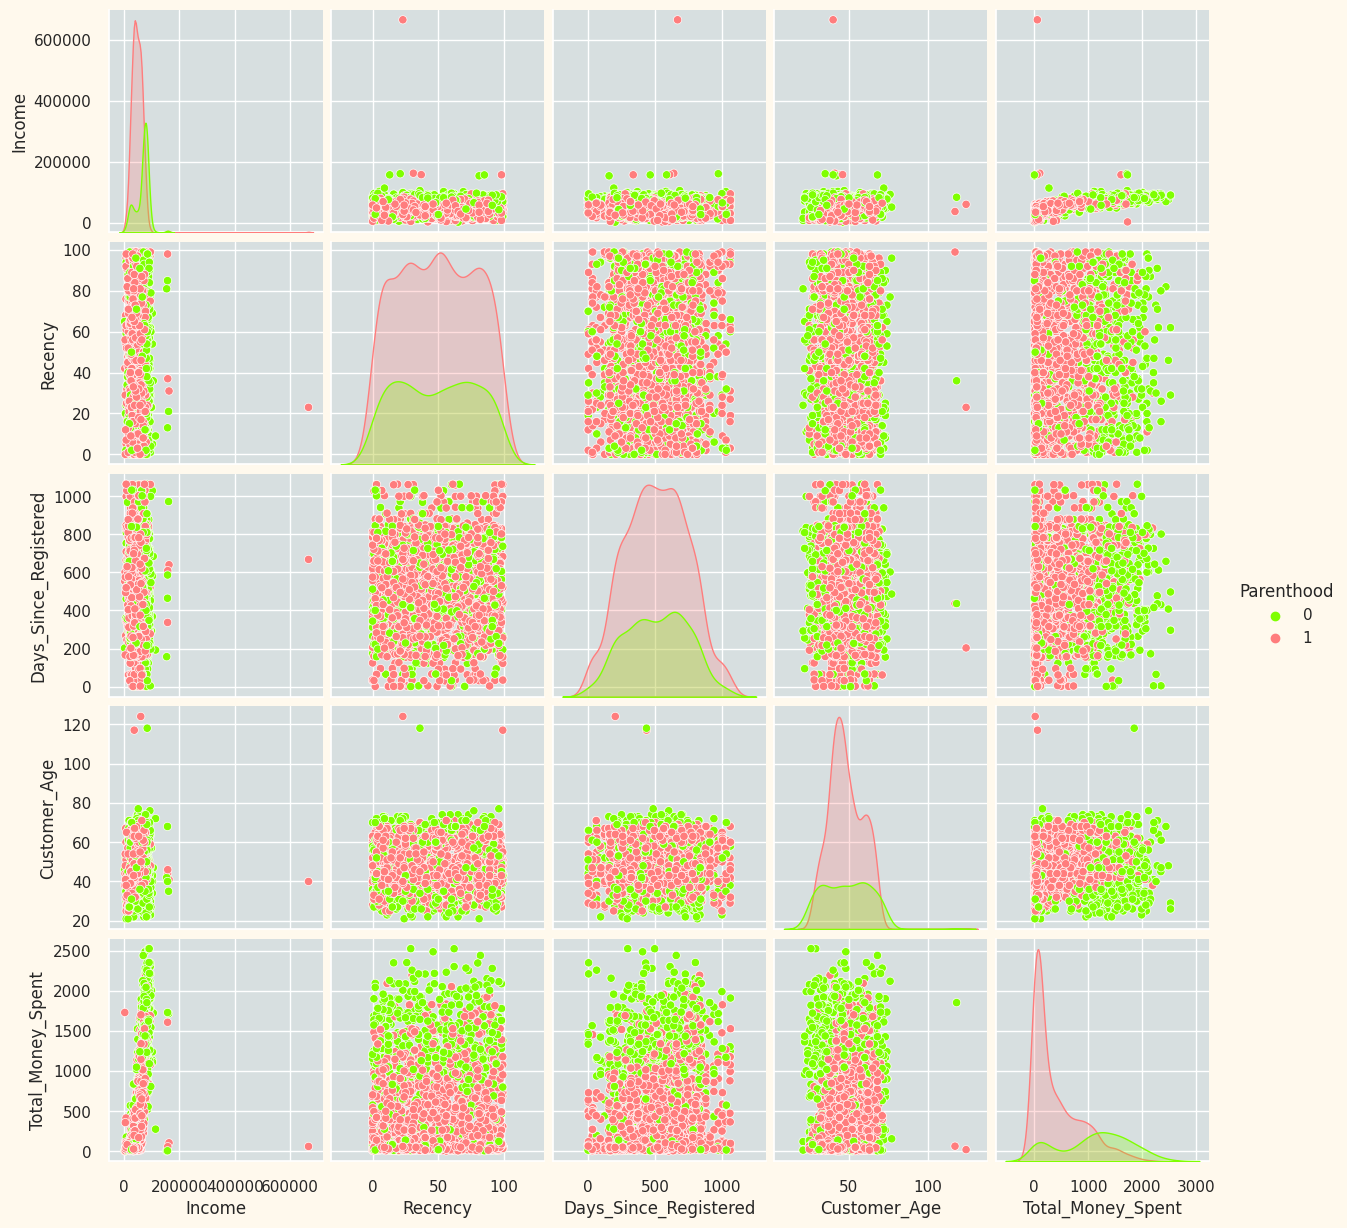

In [34]:
# # Set up color preferences for the plot
sns.set(rc={"axes.facecolor": "#D7DFE0", "figure.facecolor": "#FFF9ED"})

# pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
green_yellow_palette = ["#7FFF00", "#ADFF2F", "#FFFF00", "#FF7D7D", "#FFA500", "#FF8C00"]
cmap = colors.ListedColormap(green_yellow_palette)

#Plotting following features
columns_to_check_trends_for = [ "Income", "Recency", "Days_Since_Registered", "Customer_Age", "Total_Money_Spent", "Parenthood"]
print("Reletive Plot Of Some Selected Features wrt Parenthood")
plt.figure()
sns.pairplot(df[columns_to_check_trends_for], hue= "Parenthood",palette= (["#7FFF00","#FF7D7D"]))
plt.show()

There are clearly some outliers, like Customers with income > $25000,000, age > 100, hence we can eliminate these

In [35]:
print(f"Total Customers with Age > 100 = {df[df['Customer_Age']>100].shape[0]}")
print(f"Total Customers with Salary > 250000 = {df[df['Income']>250000].shape[0]}")
print()
print(f"Income 95th Percentile = {df['Income'].quantile(0.95)}, 99.99th Percentile = {df['Income'].quantile(0.99)}")
print(f"Customer_Age 95th Percentile = {df['Customer_Age'].quantile(0.95)}, 99th Percentile = {df['Customer_Age'].quantile(0.99)}")
print()
df[(df["Customer_Age"] > 100) | (df["Income"] > 250000)]

Total Customers with Age > 100 = 3
Total Customers with Salary > 250000 = 1

Income 95th Percentile = 84130.0, 99.99th Percentile = 94458.79999999999
Customer_Age 95th Percentile = 67.0, 99th Percentile = 72.0



Education    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
181     2n Cycle   36640.0        1         0       99        15          6   
228     2n Cycle   60182.0        0         1       23         8          0   
326          PhD   83532.0        0         0       36       755        144   
2209  Graduation  666666.0        1         0       23         9         14   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
181                 8                7                 4  ...             0   
228                 5                7                 0  ...             0   
326               562              104                64  ...             0   
2209               18                8                 1  ...             0   

      Complain  Response  Days_Since_Registered  Customer_Age  Total_Children  \
181          1         0                    436           117               1   
228          0         0                    203           124               1   
326          0         0                    436           118               0   
2209         0         0                    668            40               1   

      Relationship_Status  Total_Family_Members  Total_Money_Spent  Parenthood  
181                 Alone                     1                 65           1  
228                 Alone                     1                 22           1  
326               Partner                     2               1853           0  
2209              Partner                     3                 62           1  

[4 rows x 30 columns]

### 6.5 Updated DF for Clustering

Updated df with no outliers

In [36]:
print(f"Total Rows in Dataset before removing outliers = {df.shape[0]}")
updated_df = df.copy()
updated_df=updated_df[updated_df["Customer_Age"]<100]
print(f"Total Rows in Dataset after removing Age outliers = {updated_df.shape[0]}")
updated_df=updated_df[updated_df["Income"]<250000]
print(f"Total Rows in Dataset after removing Age & Income outliers = {updated_df.shape[0]}")

Total Rows in Dataset before removing outliers = 2216
Total Rows in Dataset after removing Age outliers = 2213
Total Rows in Dataset after removing Age & Income outliers = 2212


### 6.6 EDA DF

In [37]:
eda_df = df.copy()
print()
print(eda_df.columns)
print()
eda_df.head(5)


Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Days_Since_Registered',
       'Customer_Age', 'Total_Children', 'Relationship_Status',
       'Total_Family_Members', 'Total_Money_Spent', 'Parenthood'],
      dtype='object')



Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  Graduation  58138.0        0         0       58       635         88   
1  Graduation  46344.0        1         1       38        11          1   
2  Graduation  71613.0        0         0       26       426         49   
3  Graduation  26646.0        1         0       26        11          4   
4         PhD  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   Complain  Response  Days_Since_Registered  Customer_Age  Total_Children  \
0         0         1                    971            60               0   
1         0         0                    125            63               2   
2         0         0                    472            52               0   
3         0         0                     65            33               1   
4         0         0                    321            36               1   

   Relationship_Status  Total_Family_Members  Total_Money_Spent  Parenthood  
0                Alone                     1               1617           0  
1                Alone                     1                 27           1  
2              Partner                     2                776           0  
3              Partner                     3                 53           1  
4              Partner                     3                422           1  

[5 rows x 30 columns]

## 7 - Exploratory Data Analysis

### 7.1 Purchase Channel Preferences based on Relationship Status

#### 7.1.1 Relationship Status is `Alone`

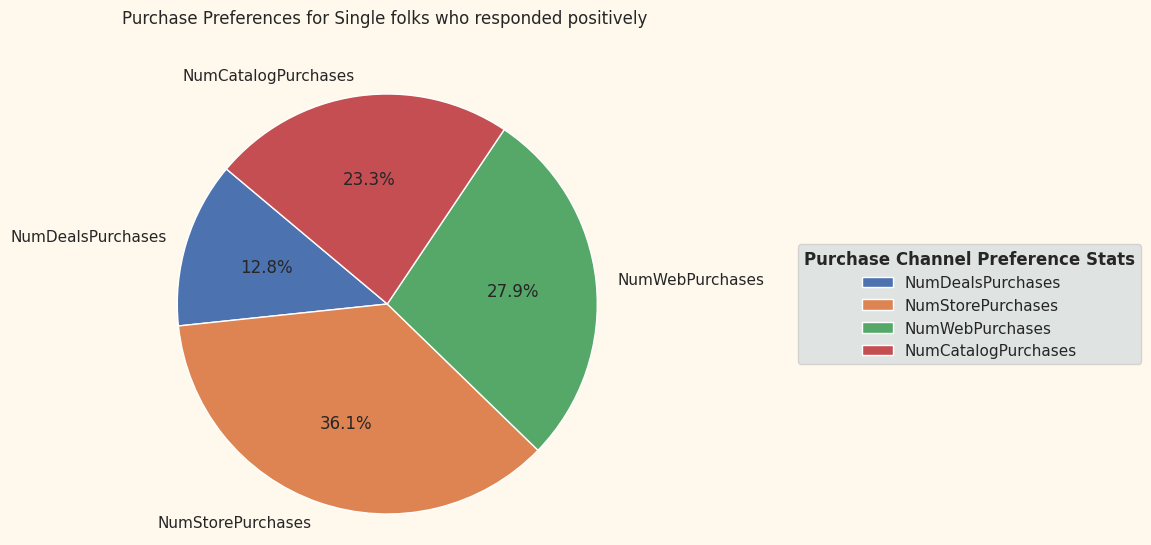

In [38]:
# sum_df=eda_df[eda_df['Response']==1]["NumDealsPurchases","NumStorePurchases","NumWebPurchases","NumCatalogPurchases"].sum()
sum_df = eda_df[(eda_df['Response'] == 1) & (eda_df['Relationship_Status']=='Alone')][["NumDealsPurchases", "NumStorePurchases", "NumWebPurchases", "NumCatalogPurchases"]].sum()
plt.figure(figsize=(8, 6))
plt.pie(sum_df, labels=sum_df.index, autopct='%1.1f%%', startangle=140)
plt.title('Purchase Preferences for Single folks who responded positively \n\n')
# Add a legend
plt.legend(sum_df.index, title="Purchase Channel Preference Stats", loc="center left", bbox_to_anchor=(1.15, 0.5),frameon = True).get_title().set_fontweight("bold")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.show()

#### 7.1.2 Relationship Status is `Partner`

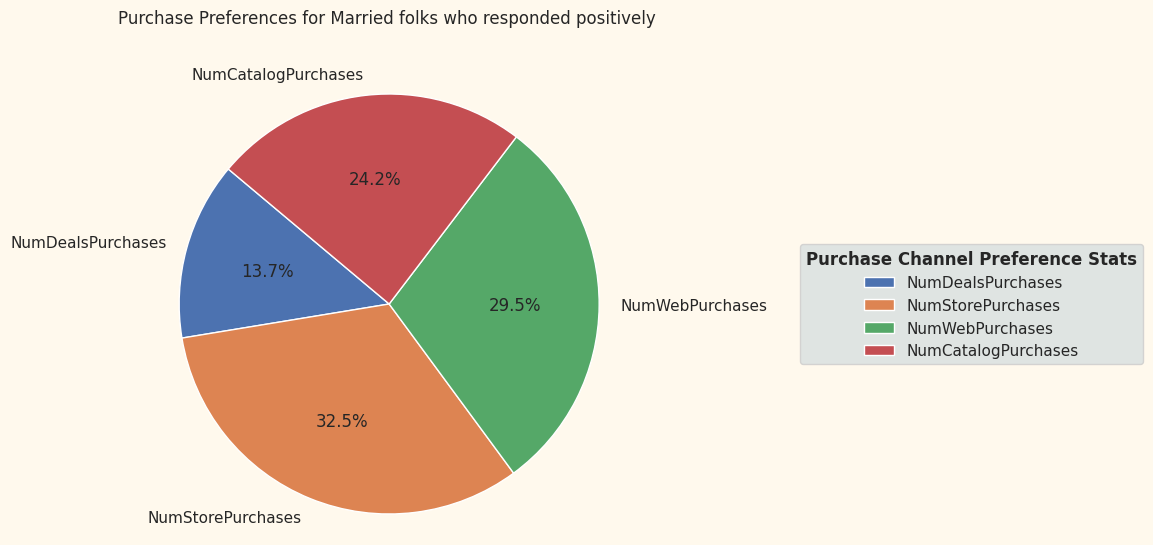

In [39]:
sum_df = eda_df[(eda_df['Response'] == 1) & (eda_df['Relationship_Status']=='Partner')][["NumDealsPurchases", "NumStorePurchases", "NumWebPurchases", "NumCatalogPurchases"]].sum()

plt.figure(figsize=(8, 6))
plt.pie(sum_df, labels=sum_df.index, autopct='%1.1f%%', startangle=140)
plt.title('Purchase Preferences for Married folks who responded positively \n\n')

# Add a legend
plt.legend(sum_df.index, title="Purchase Channel Preference Stats", loc="center left", bbox_to_anchor=(1.15, 0.5),frameon = True).get_title().set_fontweight("bold")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.show()

### 7.2 Previous Campaign Performances

#### 7.2.1 Campaign Performance for Customers who responded Yes in the latest campaign

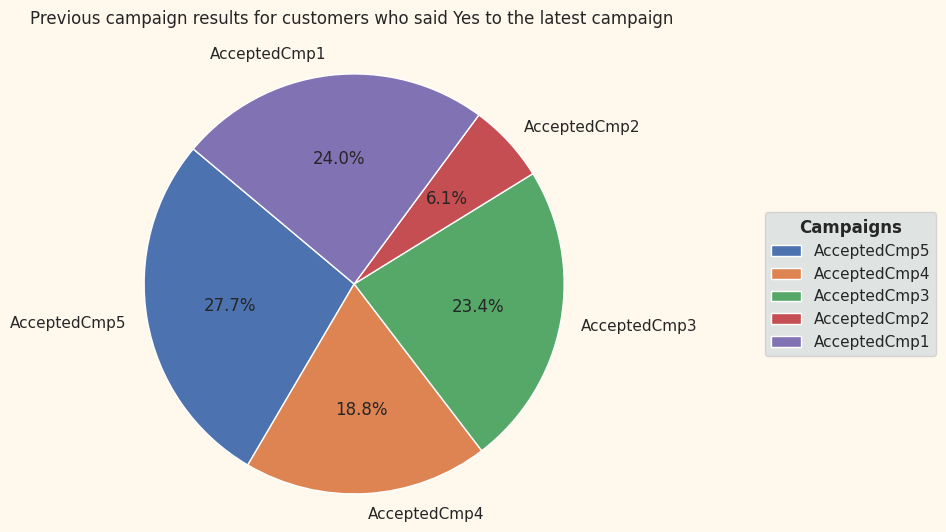

In [40]:
eda_df_2 = eda_df[eda_df["Response"]==1]
eda_df_3 = eda_df[eda_df["Response"]==1]

sum_df=eda_df_3[['AcceptedCmp5','AcceptedCmp4','AcceptedCmp3','AcceptedCmp2','AcceptedCmp1']].sum()
plt.figure(figsize=(8, 6))
plt.pie(sum_df, labels=sum_df.index, autopct='%1.1f%%', startangle=140)
plt.title('Previous campaign results for customers who said Yes to the latest campaign \n')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(sum_df.index, title="Campaigns", loc="center left", bbox_to_anchor=(1.15, 0.5),frameon = True).get_title().set_fontweight("bold")

plt.axis('equal')

plt.show()

#### 7.2.2 Campaign Performance for Customers who responded No in the latest campaign

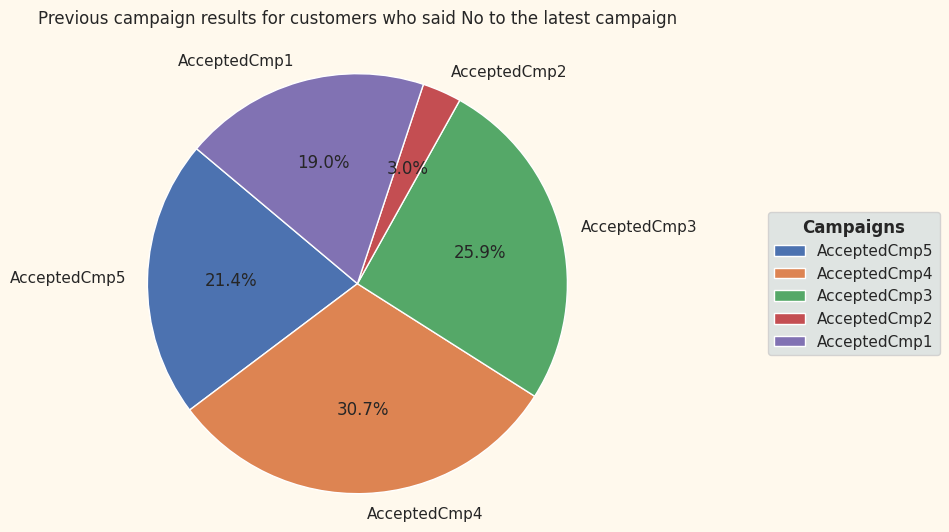

In [41]:
eda_df_2 = eda_df[eda_df["Response"]==0]
eda_df_3 = eda_df[eda_df["Response"]==0]

sum_df=eda_df_2[['AcceptedCmp5','AcceptedCmp4','AcceptedCmp3','AcceptedCmp2','AcceptedCmp1']].sum()
plt.figure(figsize=(8, 6))
plt.pie(sum_df, labels=sum_df.index, autopct='%1.1f%%', startangle=140)
plt.title('Previous campaign results for customers who said No to the latest campaign\n')

# Add a legend
plt.legend(sum_df.index, title="Campaigns", loc="center left", bbox_to_anchor=(1.15, 0.5),frameon = True).get_title().set_fontweight("bold")

plt.axis('equal')

# Display the pie chart
plt.show()


### 7.3 Latest Campaign's Performance based on Customer Age & Education Level

In [42]:
# eda_df_2 = eda_df[(eda_df["Response"]==1)]
# eda_df_3 = eda_df[(eda_df["Response"]==0)]


def histplot(feature, dataset):
  plt.figure(figsize=(15,7))
  sns.histplot(x=feature, data=dataset, hue="Education", multiple='stack')
  plt.show()

#### 7.3.1 Latest Response was `Yes`

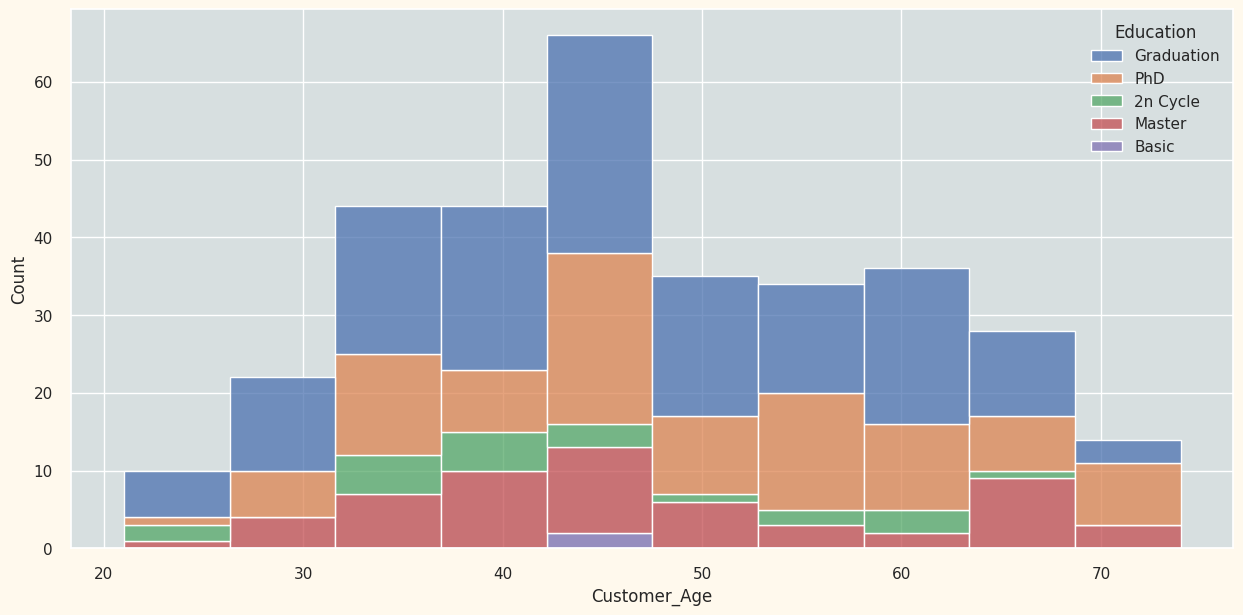

In [43]:
histplot('Customer_Age',eda_df[(eda_df["Response"]==1)])

#### 7.3.1 Response was `No`

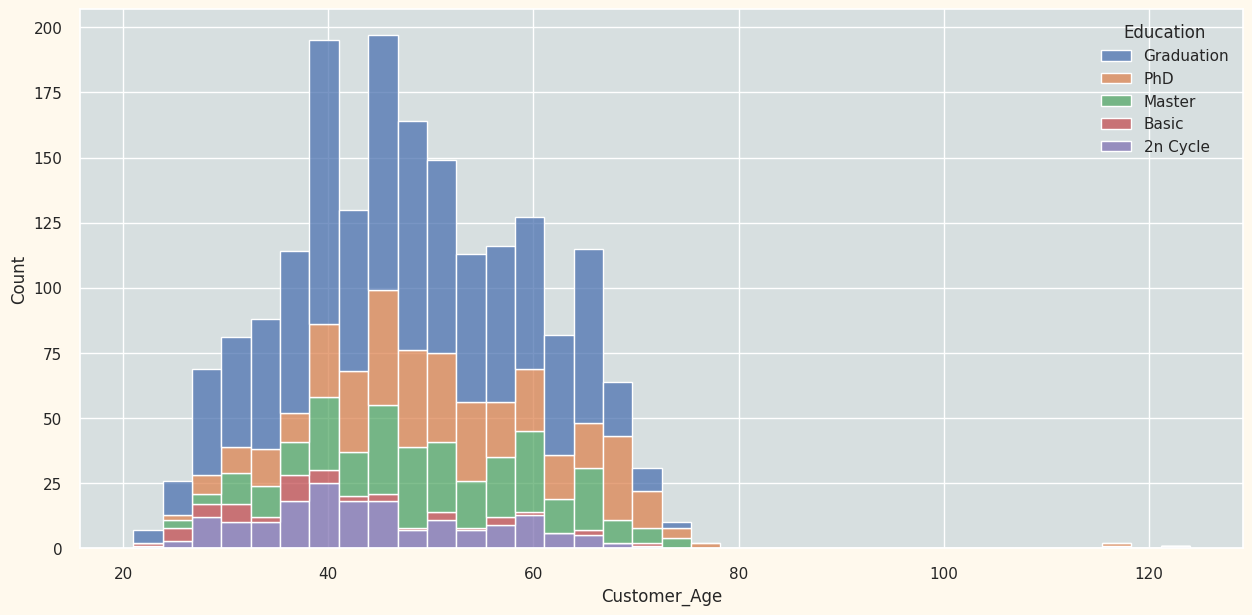

In [44]:
histplot('Customer_Age',eda_df[(eda_df["Response"]==0)])

### 7.4 Relationship Status & Education Levels

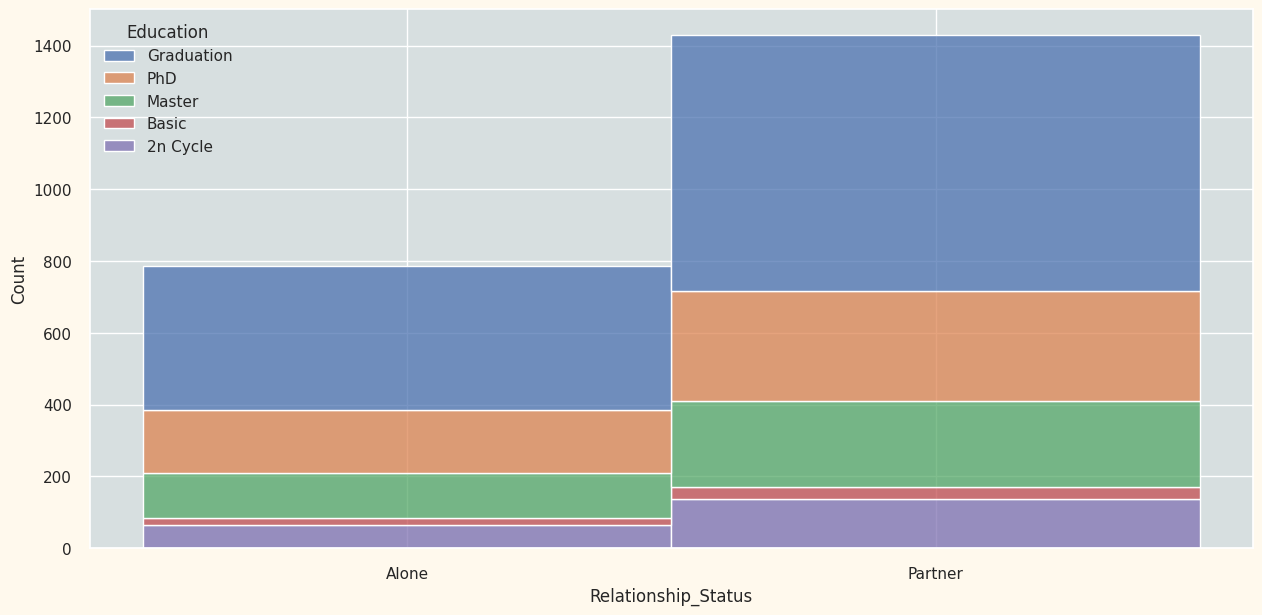

In [45]:
histplot('Relationship_Status',eda_df)

### 7.5 Money Spent & Quantity Bought for Different Products

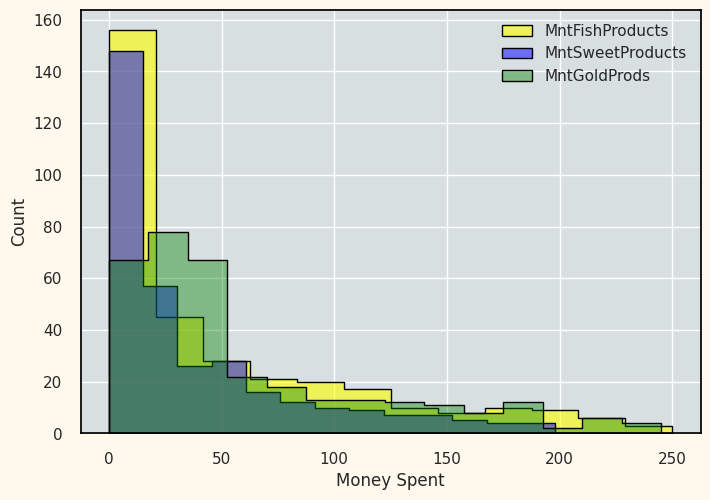

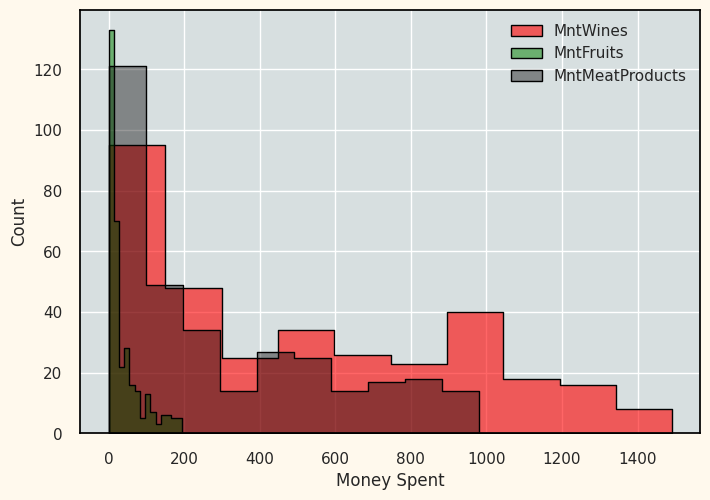

In [46]:
X=eda_df
X1 = X[X['Response']== 1]

fig, ax = plt.subplots()

sns.histplot(X1.loc[:, 'MntFishProducts'], color="yellow", stat='count', element="step", ax=ax, alpha=0.6, label='MntFishProducts',edgecolor='black')
sns.histplot(X1.loc[:, 'MntSweetProducts'], color="blue", stat='count', element="step", ax=ax, alpha=0.5, label='MntSweetProducts',edgecolor='black')
sns.histplot(X1.loc[:, 'MntGoldProds'], color="green", stat='count', element="step", ax=ax, alpha=0.4, label='MntGoldProds',edgecolor='black')

ax.legend()

ax.set_xlabel('Money Spent')

# Set the grid boundary to black for the first subplot
for spine in ax.spines.values():
    spine.set_edgecolor('black')

plt.show()


print()

X1 = X[X['Response']== 1]

fig, ax = plt.subplots()

sns.histplot(X1.loc[:, 'MntWines'], color="red", stat='count', element="step", ax=ax, alpha=0.6, label='MntWines', edgecolor='black')
sns.histplot(X1.loc[:, 'MntFruits'], color="green", stat='count', element="step", ax=ax, alpha=0.5, label='MntFruits', edgecolor='black')
sns.histplot(X1.loc[:, 'MntMeatProducts'], color="black", stat='count', element="step", ax=ax, alpha=0.4, label='MntMeatProducts', edgecolor='black')

ax.legend()

ax.set_xlabel('Money Spent')

# Set the grid boundary to black for the first subplot
for spine in ax.spines.values():
    spine.set_edgecolor('black')

plt.show()

### 7.6 Relation between Latest Campaign's Performance & Relationship Status

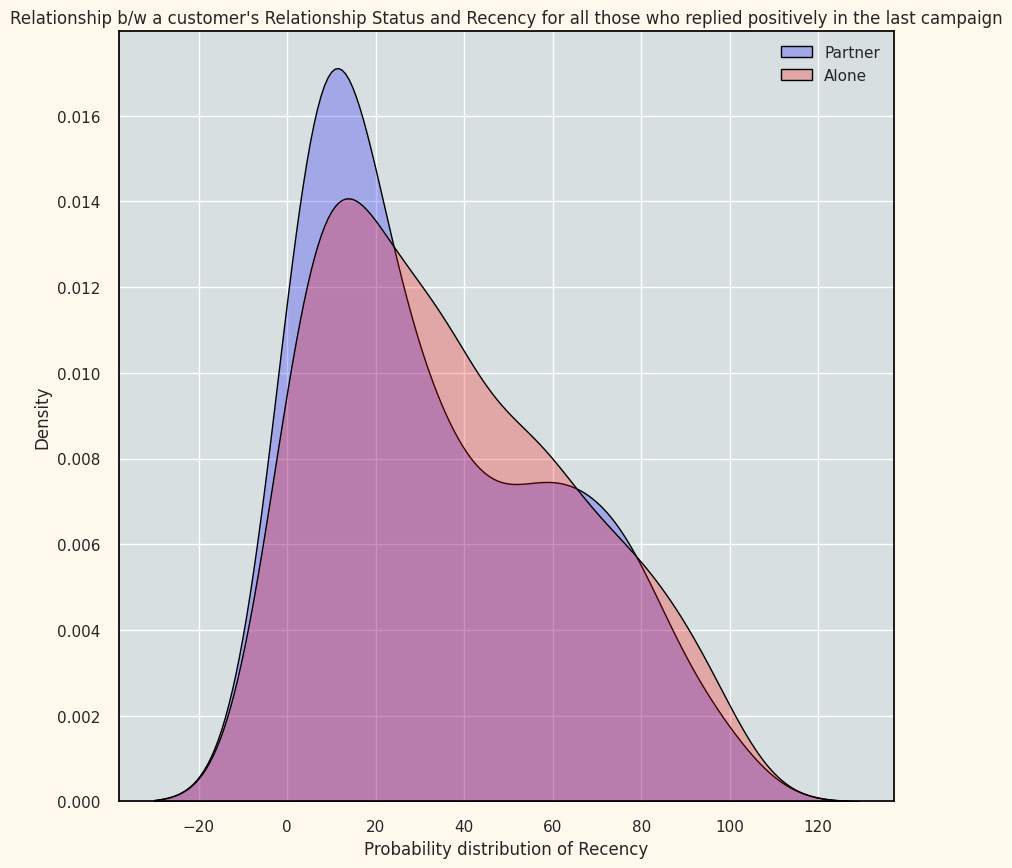

In [47]:
plt.figure(figsize=(10, 10))

# eda_df_2 = eda_df[(eda_df["Response"]==1) & (eda_df['Relationship_Status'] == 'Partner')]
# eda_df_2 = eda_df[(eda_df["Response"]==1) & (eda_df['Relationship_Status'] == 'Alone')]

sns.kdeplot(eda_df[(eda_df["Response"]==1) & (eda_df['Relationship_Status'] == 'Partner')]['Recency'], label='Partner', fill=True, color = 'blue',edgecolor='black')
sns.kdeplot(eda_df[(eda_df["Response"]==1) & (eda_df['Relationship_Status'] == 'Alone')]['Recency'], label='Alone', fill=True, color = 'red',edgecolor='black')
plt.title("Relationship b/w a customer\'s Relationship Status and Recency for all those who replied positively in the last campaign")
plt.xlabel('Probability distribution of Recency')
plt.ylabel('Density')
plt.legend()

# Set the grid boundary to black
ax = plt.gca()  # Get the current Axes instance on the current figure
for spine in ax.spines.values():
    spine.set_edgecolor('black')

plt.show()

## 8 - Handling Categorical Variables & Feature Scaling

### 8.1 Encoding Categorical Data

In [48]:
#Get list of categorical variables
dtypes_check = (updated_df.dtypes == 'object') #output is a pandas.Series of True False valuies
# print(dtypes_check)
categorical_data_columns = list(dtypes_check[dtypes_check==True].index) ## select only true values, as in dtypes = object
# print()
print("Categorical variables = ", categorical_data_columns)

Categorical variables =  ['Education', 'Relationship_Status']


In [49]:
updated_df[['Education']].value_counts(dropna=True)

Education 
Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
dtype: int64

In [50]:
updated_df[['Relationship_Status']].value_counts()

Relationship_Status
Partner                1428
Alone                   784
dtype: int64

In [51]:
try:
  updated_df = updated_df.drop(['Relationship_Status_Numerical'],axis=1) #dropping the column i created before based on above observation
except:
  print("Cant drop - Column has already been dropped or Column does not exist in the dataset")

Cant drop - Column has already been dropped or Column does not exist in the dataset


In [52]:
# LE=LabelEncoder()
# temp_df = updated_df.copy()
# for i in categorical_data_columns:
#     temp_df[i]=temp_df[[i]].apply(LE.fit_transform)
# temp_df[["Relationship_Status","Relationship_Status_Numerical"]].head(5) --- my column had 1,2, encoded has 0,1 --- similar concept
# # print("All features are now numerical")

LE=LabelEncoder()
label_mappings = {}

for i in categorical_data_columns:
    updated_df[i]=updated_df[[i]].apply(LE.fit_transform)
    label_mappings[i] = {k: v for k, v in zip(LE.classes_, LE.transform(LE.classes_))}

print(updated_df.columns)
print()
print(label_mappings)
print()
updated_df.head(3)


# for i in categorical_data_columns:
#     # Fit LabelEncoder and transform the data
#     updated_df[i] = LE.fit_transform(updated_df[i])
#     # Store the mapping of original labels to encoded labels


# # Print the mappings
# for column, mapping in label_mappings.items():
#     print(f"Mapping for {column}: {mapping}")

# print(updated_df.columns)
# updated_df.head(3)

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Days_Since_Registered',
       'Customer_Age', 'Total_Children', 'Relationship_Status',
       'Total_Family_Members', 'Total_Money_Spent', 'Parenthood'],
      dtype='object')

{'Education': {'2n Cycle': 0, 'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}, 'Relationship_Status': {'Alone': 0, 'Partner': 1}}



Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          2  58138.0        0         0       58       635         88   
1          2  46344.0        1         1       38        11          1   
2          2  71613.0        0         0       26       426         49   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp2  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   

   Complain  Response  Days_Since_Registered  Customer_Age  Total_Children  \
0         0         1                    971            60               0   
1         0         0                    125            63               2   
2         0         0                    472            52               0   

   Relationship_Status  Total_Family_Members  Total_Money_Spent  Parenthood  
0                    0                     1               1617           0  
1                    0                     1                 27           1  
2                    1                     2                776           0  

[3 rows x 30 columns]

{'Education': {'2n Cycle': 0, 'Basic': 1, 'Graduation': 2, 'Master': 3, 'PhD':4}, 'Relationship_Status': {'Alone': 0, 'Partner': 1}}

### 8.2 Scaling Data using Standard Scaler

This is necessary to avoid undermining features due to their numerical values

In [53]:
df_without_promotions_response_data = updated_df.copy()
campaign_data_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
# df_without_promotions_response_data[campaign_data_columns].head(5)

In [54]:
df_without_promotions_response_data = df_without_promotions_response_data.drop(campaign_data_columns, axis=1)
print(df_without_promotions_response_data.columns)
print()
print()
df_without_promotions_response_data.head(2)

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Days_Since_Registered', 'Customer_Age', 'Total_Children',
       'Relationship_Status', 'Total_Family_Members', 'Total_Money_Spent',
       'Parenthood'],
      dtype='object')




Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          2  58138.0        0         0       58       635         88   
1          2  46344.0        1         1       38        11          1   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0              546              172                88  ...   
1                6                2                 1  ...   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                   10                  4                  7   
1                    1                  2                  5   

   Days_Since_Registered  Customer_Age  Total_Children  Relationship_Status  \
0                    971            60               0                    0   
1                    125            63               2                    0   

   Total_Family_Members  Total_Money_Spent  Parenthood  
0                     1               1617           0  
1                     1                 27           1  

[2 rows x 23 columns]

In [55]:
#Scaling using standard scaler
std_scaler_obj = StandardScaler()
std_scaler_obj.fit(df_without_promotions_response_data) # this will compute the mean & std_dev for each of the features
scaled_df_without_promotions_response_data = pd.DataFrame(std_scaler_obj.transform(df_without_promotions_response_data), columns= df_without_promotions_response_data.columns)

In [56]:
scaled_df_without_promotions_response_data.head(5)

Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.352543  0.287105 -0.822754 -0.929699  0.310353  0.977660   1.552041   
1  -0.352543 -0.260882  1.040021  0.908097 -0.380813 -0.872618  -0.637461   
2  -0.352543  0.913196 -0.822754 -0.929699 -0.795514  0.357935   0.570540   
3  -0.352543 -1.176114  1.040021 -0.929699 -0.795514 -0.872618  -0.561961   
4   1.429916  0.294307  1.040021 -0.929699  1.554453 -0.392257   0.419540   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0         1.690293         2.453472          1.483713  ...   
1        -0.718230        -0.651004         -0.634019  ...   
2        -0.178542         1.339513         -0.147184  ...   
3        -0.655787        -0.504911         -0.585335  ...   
4        -0.218684         0.152508         -0.001133  ...   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0             2.503607          -0.555814           0.692181   
1            -0.571340          -1.171160          -0.132545   
2            -0.229679           1.290224          -0.544908   
3            -0.913000          -0.555814           0.279818   
4             0.111982           0.059532          -0.132545   

   Days_Since_Registered  Customer_Age  Total_Children  Relationship_Status  \
0               1.973583      1.018352       -1.264598            -1.349603   
1              -1.665144      1.274785        1.404572            -1.349603   
2              -0.172664      0.334530       -1.264598             0.740959   
3              -1.923210     -1.289547        0.069987             0.740959   
4              -0.822130     -1.033114        0.069987             0.740959   

   Total_Family_Members  Total_Money_Spent  Parenthood  
0             -1.142054           1.676245   -1.581139  
1             -1.142054          -0.963297    0.632456  
2             -0.244639           0.280110   -1.581139  
3              0.652776          -0.920135    0.632456  
4              0.652776          -0.307562    0.632456  

[5 rows x 23 columns]

In [57]:
scaled_df_without_promotions_response_data.describe()

Education        Income       Kidhome      Teenhome       Recency  \
count  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03  2.212000e+03   
mean   9.957877e-17 -1.252765e-16  4.175884e-17  9.636656e-17  4.015273e-18   
std    1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00   
min   -2.135002e+00 -2.333791e+00 -8.227535e-01 -9.296987e-01 -1.694030e+00   
25%   -3.525433e-01 -7.771113e-01 -8.227535e-01 -9.296987e-01 -8.646302e-01   
50%   -3.525433e-01 -2.731156e-02 -8.227535e-01 -9.296987e-01 -6.717941e-04   
75%    5.386862e-01  7.679525e-01  1.040021e+00  9.080971e-01  8.632866e-01   
max    1.429916e+00  5.131311e+00  2.902796e+00  2.745893e+00  1.727245e+00   

           MntWines     MntFruits  MntMeatProducts  MntFishProducts  \
count  2.212000e+03  2.212000e+03     2.212000e+03     2.212000e+03   
mean   4.898633e-17  1.043971e-17     3.212219e-18    -1.204582e-17   
std    1.000226e+00  1.000226e+00     1.000226e+00     1.000226e+00   
min   -9.052351e-01 -6.626279e-01    -7.449911e-01    -6.875269e-01   
25%   -8.340705e-01 -6.122946e-01    -6.736275e-01    -6.327421e-01   
50%   -3.848445e-01 -4.612945e-01    -4.416956e-01    -4.683875e-01   
75%    5.921851e-01  1.678727e-01     2.908968e-01     2.255541e-01   
max    3.521791e+00  4.345543e+00     6.948902e+00     4.042233e+00   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count      2.212000e+03  ...         2.212000e+03       2.212000e+03   
mean       3.212219e-18  ...        -8.672990e-17      -7.107033e-17   
std        1.000226e+00  ...         1.000226e+00       1.000226e+00   
min       -6.583604e-01  ...        -9.130004e-01      -1.786506e+00   
25%       -6.340186e-01  ...        -9.130004e-01      -8.634873e-01   
50%       -4.636265e-01  ...        -2.296788e-01      -2.481413e-01   
75%        1.449170e-01  ...         4.536427e-01       6.748776e-01   
max        5.719175e+00  ...         8.653501e+00       2.213242e+00   

       NumWebVisitsMonth  Days_Since_Registered  Customer_Age  Total_Children  \
count       2.212000e+03           2.212000e+03  2.212000e+03    2.212000e+03   
mean        1.092154e-16           1.429437e-16  6.183521e-17    2.248553e-17   
std         1.000226e+00           1.000226e+00  1.000226e+00    1.000226e+00   
min        -2.194360e+00          -2.202781e+00 -2.315280e+00   -1.264598e+00   
25%        -9.572709e-01          -7.404087e-01 -6.912026e-01   -1.264598e+00   
50%         2.798177e-01           3.680820e-03 -9.285849e-02    6.998729e-02   
75%         6.921805e-01           7.477704e-01  8.473966e-01    6.998729e-02   
max         6.052898e+00           2.369283e+00  2.471473e+00    2.739158e+00   

       Relationship_Status  Total_Family_Members  Total_Money_Spent  \
count         2.212000e+03          2.212000e+03       2.212000e+03   
mean         -2.730386e-17         -1.863087e-16       5.942604e-17   
std           1.000226e+00          1.000226e+00       1.000226e+00   
min          -1.349603e+00         -1.142054e+00      -9.998189e-01   
25%          -1.349603e+00         -1.142054e+00      -8.935732e-01   
50%           7.409586e-01         -2.446389e-01      -3.490638e-01   
75%           7.409586e-01          6.527760e-01       7.316544e-01   
max           7.409586e-01          2.447606e+00       3.183607e+00   

         Parenthood  
count  2.212000e+03  
mean   1.606109e-17  
std    1.000226e+00  
min   -1.581139e+00  
25%   -1.581139e+00  
50%    6.324555e-01  
75%    6.324555e-01  
max    6.324555e-01  

[8 rows x 23 columns]

## 9 - Dimensionality Reduction using Principal Component Analysis

This is done to remove features that do not add value.<br>
This can also be seen in the correlation heatmap in a way.<br>

pca_input_dataframe = scaled_df_without_promotions_response_data.copy()

In [58]:
# Assuming 'scaled_df_without_promotions_response_data' is your preprocessed DataFrame
pca_input_dataframe = scaled_df_without_promotions_response_data.copy()

### 9.1 - Determining optimal number of PCA variables using captured variance

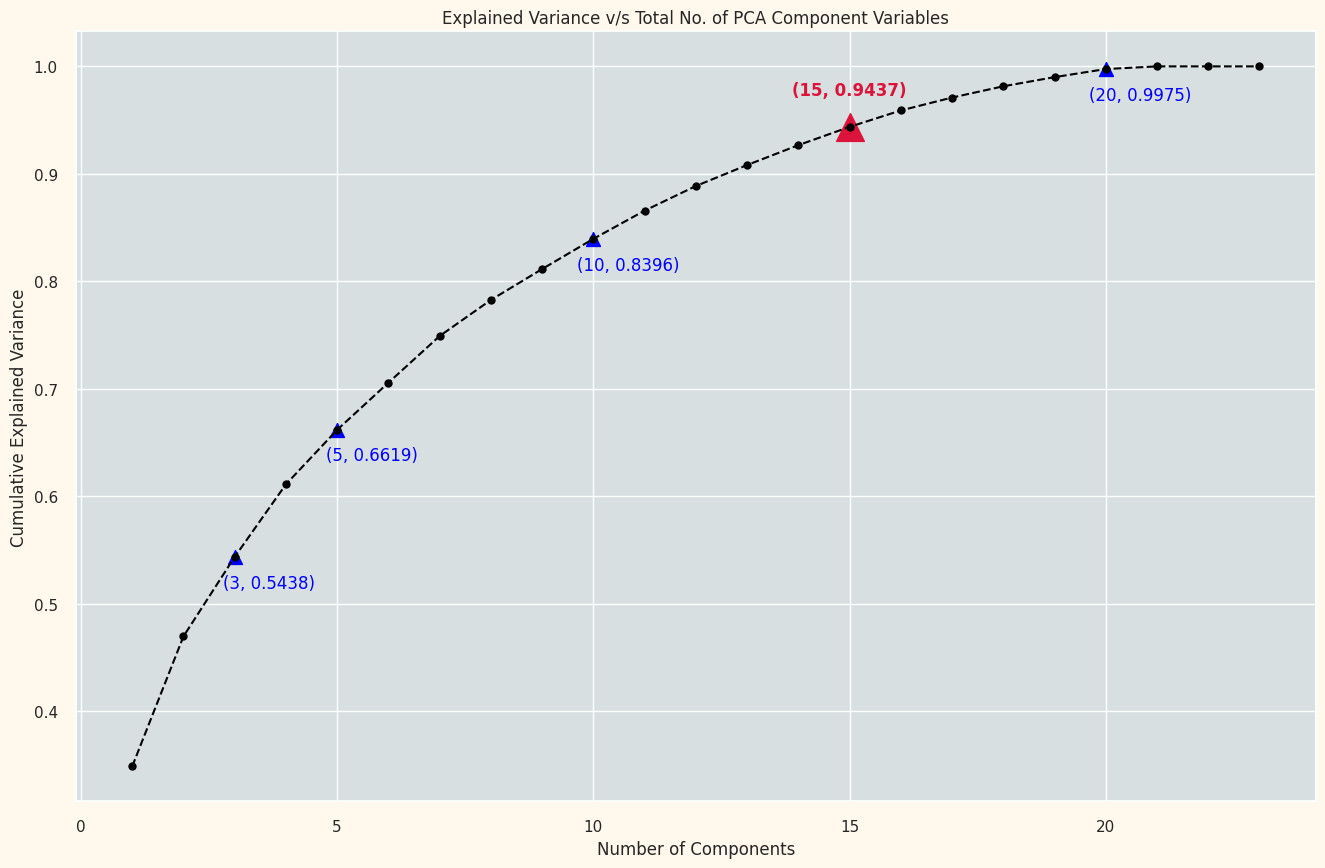



As can be seen from the above plot, 15 PCA variables seem like a good number for our analysis as they capture a good amount of cumulative variance (>94%)




In [59]:
# Fit PCA without restricting the number of components
pca = PCA()
pca.fit(pca_input_dataframe)

# Calculate the cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(16, 10))
plt.plot(range(1, 24), cumulative_explained_variance, marker='o', linestyle='--', color = 'black')
plt.title('Explained Variance v/s Total No. of PCA Component Variables')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

specific_x_values = [3,5,10,15,20]
chosen_value = 15

# Annotate specific x-values with their corresponding y-values
for x_value in specific_x_values:
    y_value = cumulative_explained_variance[x_value - 1]  # Adjust for 0-based index

    if x_value == chosen_value:
      plt.scatter(x_value, y_value, color='crimson', marker='^', s=400, label=f'Specific Point {x_value}')  # Triangle marker

      plt.annotate(
          f'({x_value}, {y_value:.4f})',
          (x_value, y_value),
          textcoords="offset points",
          xytext=(0, 20),  # Adjust the position (x, y) where the text is placed
          ha='center',
          va='bottom',
          color = 'crimson',
          weight = 'bold'
      )

    else:
      plt.scatter(x_value, y_value, color='blue', marker='^', s=100, label=f'Specific Point {x_value}')  # Triangle marker

      plt.annotate(
          f'({x_value}, {y_value:.4f})',
          (x_value, y_value),
          textcoords="offset points",
          xytext=(25, -25),  # Adjust the position (x, y) where the text is placed
          ha='center',
          va='bottom',
          color = 'blue'
      )


plt.show()

print()
print()
print('As can be seen from the above plot, 15 PCA variables seem like a good number for our analysis as they capture a good amount of cumulative variance (>94%)')
print()
print()

In [60]:
pca_input_dataframe = scaled_df_without_promotions_response_data.copy()
#Initiating PCA to reduce dimentions aka features to 3
pca_object = PCA(n_components=15)
pca_object.fit(pca_input_dataframe)

pca_output_dataframe = pd.DataFrame(pca_object.transform(pca_input_dataframe), columns=(['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15']))

pca_output_dataframe.describe().T # .T --- transpose stats for new components


count          mean       std       min       25%       50%  \
col_1   2212.0  5.781993e-17  2.833291 -5.838552 -2.548569 -0.823295   
col_2   2212.0  4.497106e-17  1.668096 -4.054596 -1.248502 -0.231804   
col_3   2212.0  1.043971e-17  1.304643 -2.575416 -1.048764 -0.477828   
col_4   2212.0  5.942604e-17  1.246350 -3.945991 -0.849645  0.028457   
col_5   2212.0  4.256190e-17  1.079715 -3.998237 -0.691519  0.028965   
col_6   2212.0  6.263826e-17  1.004384 -2.941542 -0.855770  0.034899   
col_7   2212.0  5.460771e-17  0.999476 -3.515793 -0.685936  0.060927   
col_8   2212.0  1.606109e-18  0.878945 -4.095087 -0.593899  0.001699   
col_9   2212.0  3.212219e-18  0.813266 -4.562579 -0.442081 -0.017011   
col_10  2212.0  5.781993e-17  0.803919 -2.524484 -0.525547 -0.038288   
col_11  2212.0  2.890997e-17  0.776800 -3.153143 -0.442480 -0.003205   
col_12  2212.0 -1.967484e-17  0.725706 -2.422815 -0.427747 -0.031055   
col_13  2212.0 -1.887178e-17  0.670240 -2.473659 -0.344143 -0.016426   
col_14  2212.0  2.087942e-17  0.652408 -3.278032 -0.267319  0.006992   
col_15  2212.0 -3.051608e-17  0.625599 -2.852502 -0.212364 -0.002426   

             75%       max  
col_1   2.395027  7.490678  
col_2   1.212777  6.237591  
col_3   1.226385  3.473693  
col_4   0.774340  4.927387  
col_5   0.728462  4.212044  
col_6   0.835131  3.310056  
col_7   0.672115  5.142704  
col_8   0.554145  4.218957  
col_9   0.404316  8.720289  
col_10  0.479285  3.777825  
col_11  0.483766  5.027961  
col_12  0.439003  4.616923  
col_13  0.343557  4.361751  
col_14  0.261798  4.725961  
col_15  0.176221  3.331804

In [61]:
# any(pca_output_dataframe.iloc[:, :3].duplicated())
# print()
# print()

# duplicates = pca_output_dataframe[pca_output_dataframe.iloc[:, :3].duplicated(keep=False)]
# duplicates_count = duplicates.shape[0]
# print(duplicates)
# print(f'Count of duplicate rows: {duplicates_count}')

### 9.2 - Access PCA Loadings

In [62]:
pca_loadings = pca_object.components_

# Create a DataFrame of loadings for easier interpretation
pca_loadings_df = pd.DataFrame(pca_loadings, columns=pca_input_dataframe.columns, index=['PC_1', 'PC_2', 'PC_3','PC_4','PC_5','PC_6','PC_7','PC_8','PC_9','PC_10','PC_11','PC_12','PC_13','PC_14','PC_15'])

# Display the top contributing features for each component
pca_loadings_df.T

PC_1      PC_2      PC_3      PC_4      PC_5  \
Education              0.011456  0.128221  0.100167 -0.423717  0.428263   
Income                 0.288339  0.147181 -0.043929 -0.186500 -0.090240   
Kidhome               -0.246524  0.005723 -0.069088  0.167988 -0.191497   
Teenhome              -0.088131  0.461834  0.117771 -0.209379 -0.231555   
Recency                0.004082  0.018726 -0.014377  0.020895 -0.070287   
MntWines               0.264066  0.201975  0.074227 -0.033060  0.247108   
MntFruits              0.243655 -0.011942 -0.073953  0.143231 -0.266403   
MntMeatProducts        0.291065 -0.015359 -0.070516  0.017100 -0.005839   
MntFishProducts        0.253984 -0.022830 -0.083234  0.151783 -0.251645   
MntSweetProducts       0.242766  0.000678 -0.079024  0.148385 -0.265209   
MntGoldProds           0.194566  0.117377  0.059456  0.231728 -0.116466   
NumDealsPurchases     -0.071297  0.373707  0.166727  0.259464  0.001344   
NumWebPurchases        0.175975  0.305270  0.153908  0.148862  0.137908   
NumCatalogPurchases    0.284483  0.086516 -0.018257 -0.012903  0.013608   
NumStorePurchases      0.249520  0.195898  0.031926 -0.000829  0.003478   
NumWebVisitsMonth     -0.228532  0.090407  0.173582  0.337671  0.278939   
Days_Since_Registered  0.030154  0.116263  0.152523  0.473737  0.364818   
Customer_Age           0.043498  0.229775  0.098044 -0.394481  0.025491   
Total_Children        -0.240622  0.339479  0.036026 -0.031693 -0.305351   
Relationship_Status   -0.025832  0.169118 -0.684981  0.058457  0.239043   
Total_Family_Members  -0.123868  0.297229 -0.587367  0.041102  0.077979   
Total_Money_Spent      0.328589  0.114617  0.002579  0.041108  0.067642   
Parenthood            -0.238549  0.306967  0.071972  0.031903 -0.205237   

                           PC_6      PC_7      PC_8      PC_9     PC_10  \
Education              0.121876  0.398478 -0.137731 -0.408649  0.309080   
Income                 0.027829  0.140291 -0.003953  0.074772 -0.157454   
Kidhome                0.126706  0.458195 -0.200605  0.002189  0.208295   
Teenhome              -0.053065 -0.194619 -0.015611 -0.005536 -0.243537   
Recency                0.955946 -0.218543  0.149258 -0.065385  0.017467   
MntWines               0.049942  0.149996  0.125095  0.048056 -0.144275   
MntFruits             -0.047735  0.025477 -0.159702 -0.382065  0.105524   
MntMeatProducts        0.100684  0.234100 -0.211279  0.264464 -0.008219   
MntFishProducts       -0.035772 -0.025316 -0.203635 -0.187869  0.166554   
MntSweetProducts      -0.003098 -0.007428 -0.155868 -0.377924 -0.048095   
MntGoldProds          -0.064549 -0.188648  0.264328  0.149122  0.583610   
NumDealsPurchases      0.010317  0.162892 -0.010231  0.346911  0.195589   
NumWebPurchases       -0.088878 -0.044063  0.373711 -0.270446  0.092592   
NumCatalogPurchases    0.072035  0.130588 -0.112341  0.373612  0.035632   
NumStorePurchases     -0.050655  0.009649  0.211203 -0.127445 -0.288423   
NumWebVisitsMonth     -0.022657 -0.026614  0.018060 -0.174605  0.150782   
Days_Since_Registered  0.074980 -0.189725 -0.525134 -0.039744 -0.303644   
Customer_Age          -0.045102 -0.496258 -0.433975  0.058514  0.325143   
Total_Children         0.052243  0.186944 -0.155060 -0.002452 -0.027621   
Relationship_Status   -0.041795 -0.112488  0.048612 -0.006714  0.040166   
Total_Family_Members   0.000090 -0.009156 -0.017310 -0.009990  0.019593   
Total_Money_Spent      0.053284  0.153792 -0.025594  0.070080 -0.014926   
Parenthood            -0.007591  0.108547  0.089707 -0.121047 -0.138137   

                          PC_11     PC_12     PC_13     PC_14     PC_15  
Education             -0.205120  0.318415  0.057583  0.063162  0.048468  
Income                -0.071734 -0.101928  0.007472  0.083079 -0.063737  
Kidhome                0.035155 -0.338711 -0.301833  0.187087 -0.107563  
Teenhome              -0.205110  0.128097  0.257412 -0.164900  0.086668  
Recency                0.047983  0.028846 -0.014350 -0.

## 10 - Clustering

### 10.1 Agglomerative Clustering

#### 10.1.1 Determining Number of Clusters

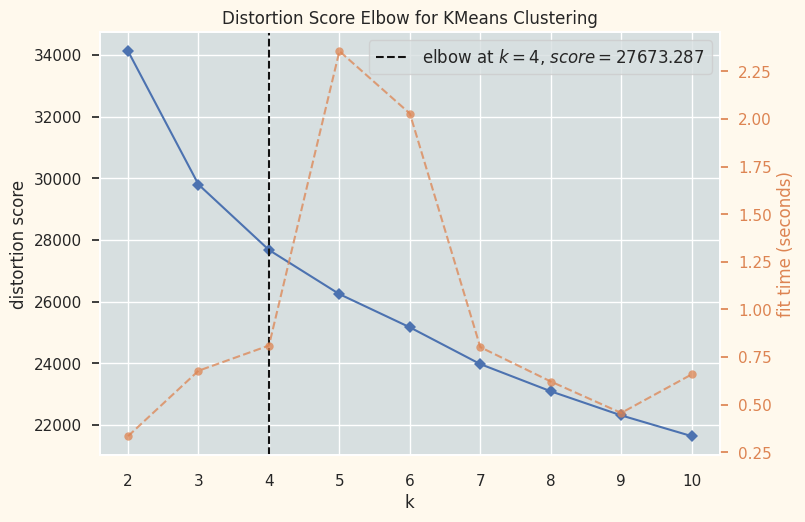

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
Elbow_M_Agglomerative_Clustering = KElbowVisualizer(KMeans(n_init=10), k=10)
Elbow_M_Agglomerative_Clustering.fit(pca_output_dataframe)
Elbow_M_Agglomerative_Clustering.show()

#### 10.1.2 Applying Agglomerative Clustering Algorithm

pca_output_dataframe_AC = pca_output_dataframe.copy()<br>
updated_df_with_AC = updated_df.copy()

In [64]:
agglo_clustering_obj = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
pca_output_dataframe_AC = pca_output_dataframe.copy()

yhat_agglo_cluster_output = agglo_clustering_obj.fit_predict(pca_output_dataframe_AC)
pca_output_dataframe_AC["AC_Cluster_Number"] = yhat_agglo_cluster_output
pca_output_dataframe_AC.head(5)

col_1     col_2     col_3     col_4     col_5     col_6     col_7  \
0  4.796132 -0.322903  1.638705  2.139088  0.462970  0.467552 -0.586470   
1 -2.708514 -0.500238  1.418845 -1.992341 -1.949197 -0.332781  0.018686   
2  2.494909 -0.737845 -0.682147 -0.069110  0.717544 -1.206964 -0.791296   
3 -2.764447 -1.439596 -1.449932 -0.081905 -0.426376 -0.814479  1.116071   
4 -0.604395  0.481871 -0.974511  0.161296  0.054629  1.747926  1.775544   

      col_8     col_9    col_10    col_11    col_12    col_13    col_14  \
0 -2.084229  0.089916  1.188213  0.724354 -0.607793  1.248613 -0.529169   
1 -0.514032  0.629679  0.371259  0.324478 -0.705003  0.048951 -0.054251   
2  0.699040 -0.723660 -0.022817  0.818434 -0.205358 -1.111250  0.059256   
3  1.225549 -0.004709  0.280086  0.551370 -0.020270 -0.151863 -0.046176   
4  0.657355 -0.692918  0.808543  0.875515  1.146771 -0.235320  0.014733   

     col_15  AC_Cluster_Number  
0  0.804055                  2  
1 -0.121662                  1  
2  0.779348                  2  
3  0.172388                  0  
4  0.130038                  0

In [65]:
#Adding the Clusters feature to the orignal dataframe.
updated_df_with_clustering = updated_df.copy()
updated_df_with_clustering["AC_Cluster_Number"]= yhat_agglo_cluster_output
updated_df_with_clustering.head(5)

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          2  58138.0        0         0       58       635         88   
1          2  46344.0        1         1       38        11          1   
2          2  71613.0        0         0       26       426         49   
3          2  26646.0        1         0       26        11          4   
4          4  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Complain  \
0              546              172                88  ...         0   
1                6                2                 1  ...         0   
2              127              111                21  ...         0   
3               20               10                 3  ...         0   
4              118               46                27  ...         0   

   Response  Days_Since_Registered  Customer_Age  Total_Children  \
0         1                    971            60               0   
1         0                    125            63               2   
2         0                    472            52               0   
3         0                     65            33               1   
4         0                    321            36               1   

   Relationship_Status  Total_Family_Members  Total_Money_Spent  Parenthood  \
0                    0                     1               1617           0   
1                    0                     1                 27           1   
2                    1                     2                776           0   
3                    1                     3                 53           1   
4                    1                     3                422           1   

   AC_Cluster_Number  
0                  2  
1                  1  
2                  2  
3                  0  
4                  0  

[5 rows x 31 columns]

In [66]:
pca_output_dataframe_AC.head(5)

col_1     col_2     col_3     col_4     col_5     col_6     col_7  \
0  4.796132 -0.322903  1.638705  2.139088  0.462970  0.467552 -0.586470   
1 -2.708514 -0.500238  1.418845 -1.992341 -1.949197 -0.332781  0.018686   
2  2.494909 -0.737845 -0.682147 -0.069110  0.717544 -1.206964 -0.791296   
3 -2.764447 -1.439596 -1.449932 -0.081905 -0.426376 -0.814479  1.116071   
4 -0.604395  0.481871 -0.974511  0.161296  0.054629  1.747926  1.775544   

      col_8     col_9    col_10    col_11    col_12    col_13    col_14  \
0 -2.084229  0.089916  1.188213  0.724354 -0.607793  1.248613 -0.529169   
1 -0.514032  0.629679  0.371259  0.324478 -0.705003  0.048951 -0.054251   
2  0.699040 -0.723660 -0.022817  0.818434 -0.205358 -1.111250  0.059256   
3  1.225549 -0.004709  0.280086  0.551370 -0.020270 -0.151863 -0.046176   
4  0.657355 -0.692918  0.808543  0.875515  1.146771 -0.235320  0.014733   

     col_15  AC_Cluster_Number  
0  0.804055                  2  
1 -0.121662                  1  
2  0.779348                  2  
3  0.172388                  0  
4  0.130038                  0

#### 10.1.3 Agglomerative Cluster Distribution

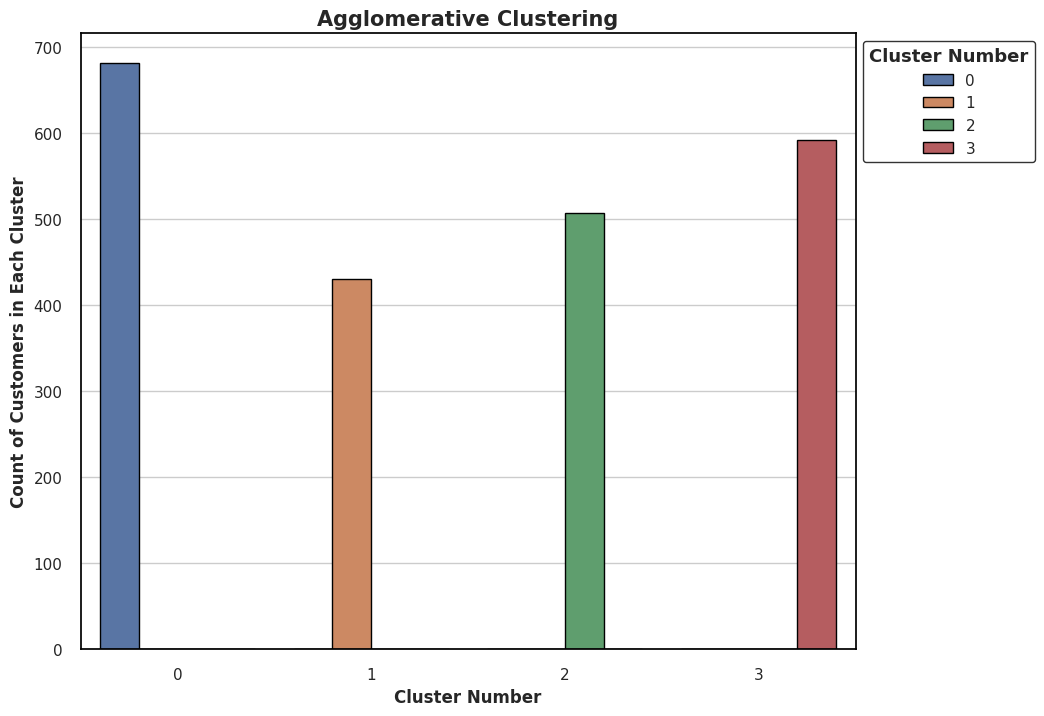



Number of customers in cluster 0 = 682
Number of customers in cluster 1 = 431
Number of customers in cluster 2 = 507
Number of customers in cluster 3 = 592


In [67]:
 # Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 8))  # Optional

# Create the count plot
sns.countplot(data=pca_output_dataframe_AC, x='AC_Cluster_Number',hue='AC_Cluster_Number',edgecolor='black')

# Add labels and a title
plt.xlabel('Cluster Number',fontweight='bold',fontsize=12)
plt.ylabel('Count of Customers in Each Cluster',fontweight='bold',fontsize=12)
plt.title('Agglomerative Clustering',fontweight='bold',fontsize=15)

# # Adding the legend to the plot
legend = plt.legend(title='Cluster Number', title_fontsize='13', loc='upper left', bbox_to_anchor=(1,1), frameon=True)
legend.get_title().set_fontweight("bold")
legend.get_frame().set_edgecolor('black')

# Modify the spines to add a black border
for spine in ax.spines.values():
    spine.set_edgecolor('black')

# Show the plot
plt.show()

# Show the plot
plt.show()

print()
print()

for i in range(4):
  print(f"Number of customers in cluster {i} = {pca_output_dataframe_AC[pca_output_dataframe_AC['AC_Cluster_Number']==i].shape[0]}")

### 10.2 KMeans Clustering

In [68]:
try:
  pca_output_dataframe.drop(['cluster'],axis=1)
except:
  print("Cant complete operation. Column has been either dropped already or it does not exist in the dataframe.")

Cant complete operation. Column has been either dropped already or it does not exist in the dataframe.


#### 10.2.1 Determining Number of Clusters

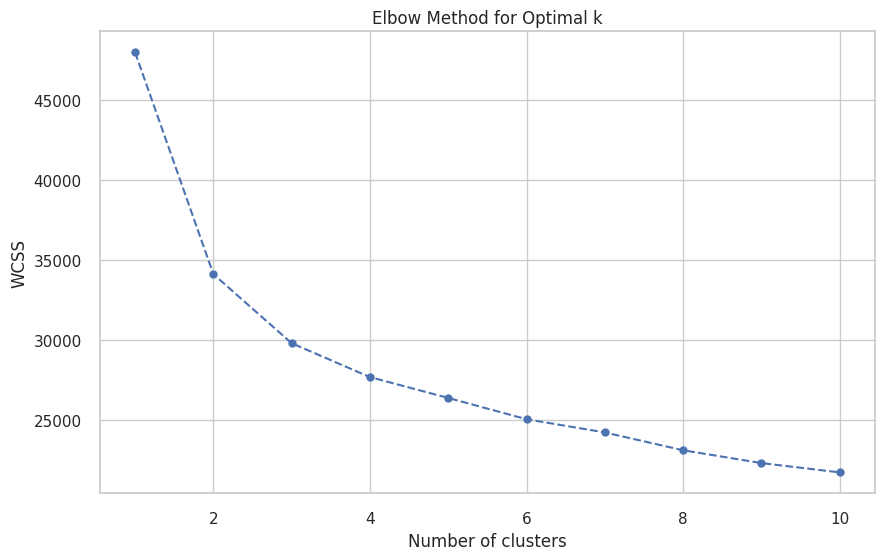

In [69]:
# Constructing a sample dataframe based on the provided statistics
np.random.seed(10)  # For reproducibility and choosing random centroids


# Determine the number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_output_dataframe)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Assuming the optimal number of clusters based on the elbow plot
optimal_clusters = 4 # Example, adjust based on your observation from the plot


#### 10.2.2 Applying KMeans Clustering Algorithm

In [70]:
# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(pca_output_dataframe)

# Add the cluster assignments to the dataframe
pca_output_dataframe_AC['KMeans_Cluster_Number'] = clusters
updated_df_with_clustering['KMeans_Cluster_Number'] = clusters
# Display the first few rows of the dataframe with cluster assignments
# pca_output_dataframe.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [71]:
pca_output_dataframe_AC.head(5)

col_1     col_2     col_3     col_4     col_5     col_6     col_7  \
0  4.796132 -0.322903  1.638705  2.139088  0.462970  0.467552 -0.586470   
1 -2.708514 -0.500238  1.418845 -1.992341 -1.949197 -0.332781  0.018686   
2  2.494909 -0.737845 -0.682147 -0.069110  0.717544 -1.206964 -0.791296   
3 -2.764447 -1.439596 -1.449932 -0.081905 -0.426376 -0.814479  1.116071   
4 -0.604395  0.481871 -0.974511  0.161296  0.054629  1.747926  1.775544   

      col_8     col_9    col_10    col_11    col_12    col_13    col_14  \
0 -2.084229  0.089916  1.188213  0.724354 -0.607793  1.248613 -0.529169   
1 -0.514032  0.629679  0.371259  0.324478 -0.705003  0.048951 -0.054251   
2  0.699040 -0.723660 -0.022817  0.818434 -0.205358 -1.111250  0.059256   
3  1.225549 -0.004709  0.280086  0.551370 -0.020270 -0.151863 -0.046176   
4  0.657355 -0.692918  0.808543  0.875515  1.146771 -0.235320  0.014733   

     col_15  AC_Cluster_Number  KMeans_Cluster_Number  
0  0.804055                  2                      1  
1 -0.121662                  1                      0  
2  0.779348                  2                      1  
3  0.172388                  0                      3  
4  0.130038                  0                      3

In [72]:
print(pca_output_dataframe_AC['KMeans_Cluster_Number'].value_counts(sort=True,ascending=True))
print()
print()
print(pca_output_dataframe_AC['AC_Cluster_Number'].value_counts(sort=True, ascending= True))

0    488
1    515
2    561
3    648
Name: KMeans_Cluster_Number, dtype: int64


1    431
2    507
3    592
0    682
Name: AC_Cluster_Number, dtype: int64


#### 10.2.3 KMeans Cluster Distribution

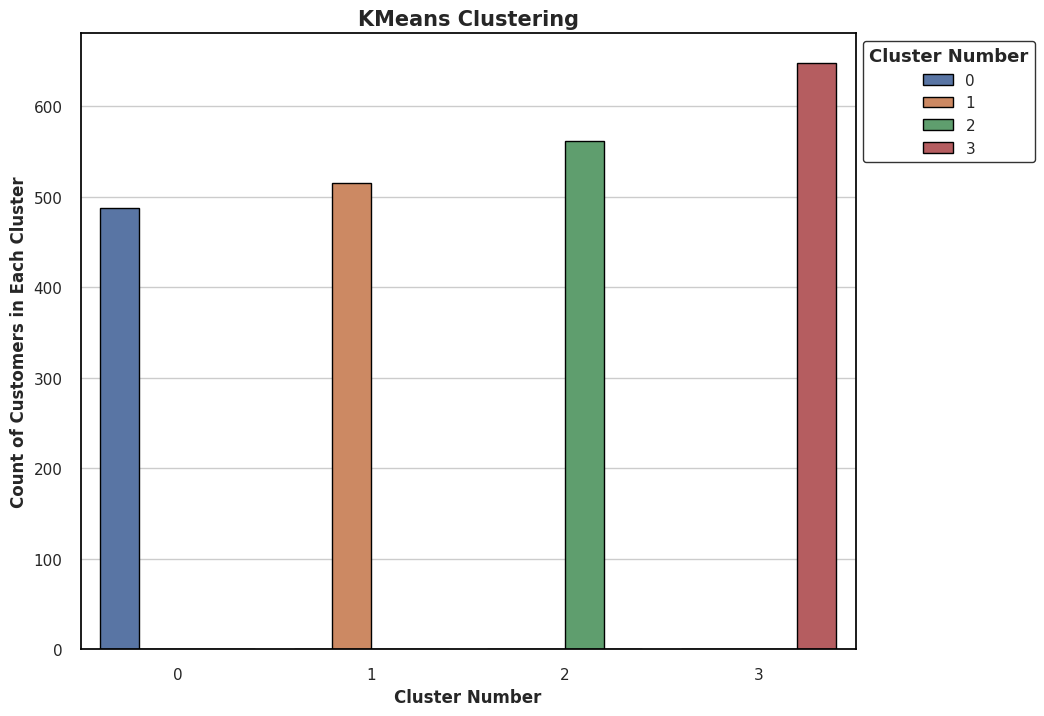



Number of customers in cluster 0 = 488
Number of customers in cluster 1 = 515
Number of customers in cluster 2 = 561
Number of customers in cluster 3 = 648


In [73]:
 # Set the style of the plot (optional)
sns.set(style="whitegrid")

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 8))  # Optional

# Create the count plot
sns.countplot(data=pca_output_dataframe_AC, x='KMeans_Cluster_Number',hue='KMeans_Cluster_Number',edgecolor='black')

# Add labels and a title
plt.xlabel('Cluster Number',fontweight='bold',fontsize=12)
plt.ylabel('Count of Customers in Each Cluster',fontweight='bold',fontsize=12)
plt.title('KMeans Clustering',fontweight='bold',fontsize=15)

# # Adding the legend to the plot
legend = plt.legend(title='Cluster Number', title_fontsize='13', loc='upper left', bbox_to_anchor=(1,1), frameon=True)
legend.get_title().set_fontweight("bold")
legend.get_frame().set_edgecolor('black')

# Modify the spines to add a black border
for spine in ax.spines.values():
    spine.set_edgecolor('black')

# Show the plot
plt.show()

# Show the plot
plt.show()

print()
print()

for i in range(4):
  print(f"Number of customers in cluster {i} = {pca_output_dataframe_AC[pca_output_dataframe_AC['KMeans_Cluster_Number']==i].shape[0]}")

## 11 - Analysis of Clustering Results & Segmentation

- For the sake of simplicity, we are proceeding with customer Segmentation Based on ***`Agglomerative Clustering`.***

<br>

- *Note - Cluster Number can be different even for similar looking clusters from different clustering algorithms*

#### 11.1 Creating a dataframe copy to use for segmentation

In [74]:
segmentation_df = updated_df_with_clustering.copy()
print()
print(segmentation_df.columns)
print()
segmentation_df.head(3)


Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Days_Since_Registered',
       'Customer_Age', 'Total_Children', 'Relationship_Status',
       'Total_Family_Members', 'Total_Money_Spent', 'Parenthood',
       'AC_Cluster_Number', 'KMeans_Cluster_Number'],
      dtype='object')



Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          2  58138.0        0         0       58       635         88   
1          2  46344.0        1         1       38        11          1   
2          2  71613.0        0         0       26       426         49   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Response  \
0              546              172                88  ...         1   
1                6                2                 1  ...         0   
2              127              111                21  ...         0   

   Days_Since_Registered  Customer_Age  Total_Children  Relationship_Status  \
0                    971            60               0                    0   
1                    125            63               2                    0   
2                    472            52               0                    1   

   Total_Family_Members  Total_Money_Spent  Parenthood  AC_Cluster_Number  \
0                     1               1617           0                  2   
1                     1                 27           1                  1   
2                     2                776           0                  2   

   KMeans_Cluster_Number  
0                      1  
1                      0  
2                      1  

[3 rows x 32 columns]

### 11.2 Clustering Analysis

#### 11.2.1 Overall Income v/s Spending

<Figure size 800x600 with 0 Axes>

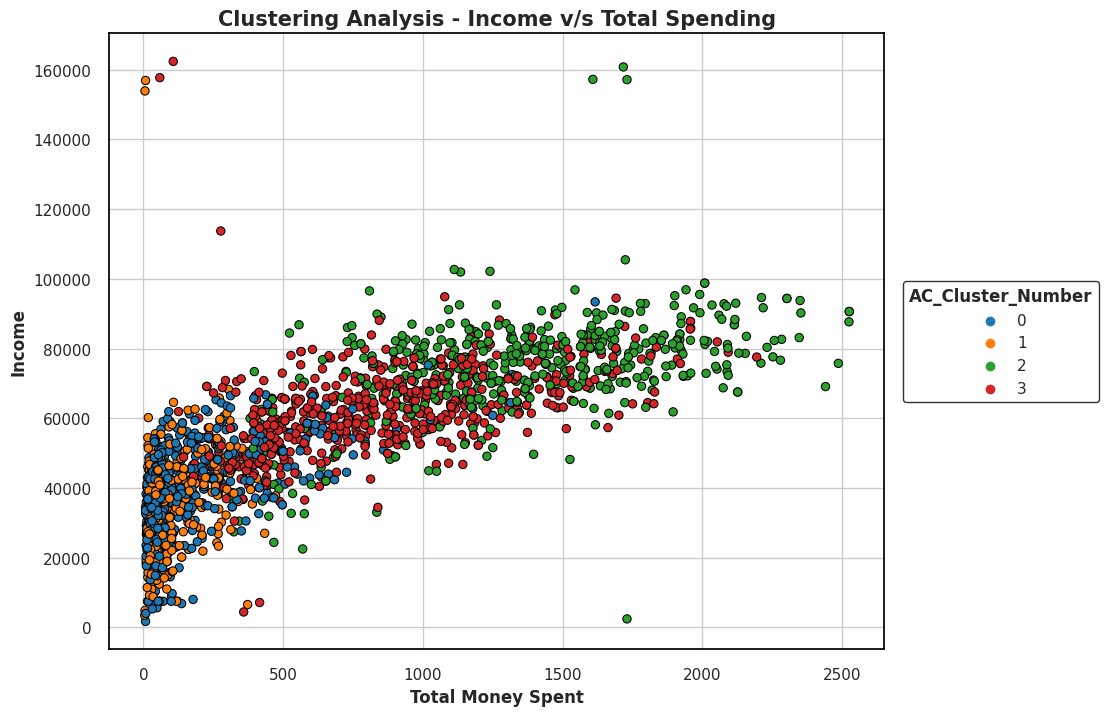

In [75]:
plt.figure(figsize=(8, 6))

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 8))  # Optional

pl = sns.scatterplot(data = segmentation_df,x=segmentation_df["Total_Money_Spent"], y=segmentation_df["Income"],hue=segmentation_df["AC_Cluster_Number"],palette = "tab10",edgecolor='black',linewidth=0.75)
# pl.set_title("Clustering Analysis - Income v/s Total Spending")


plt.xlabel('Total Money Spent',fontweight='bold',size=12)
plt.ylabel('Income',fontweight='bold',size=12)
plt.title('Clustering Analysis - Income v/s Total Spending',fontweight='bold',size=15)

# Adding the legend to the plot

legend = plt.legend(title="AC_Cluster_Number",fancybox=True,loc='center',bbox_to_anchor=(1.15,0.5),frameon=True)
legend.get_title().set_fontweight("bold")
legend.get_frame().set_edgecolor('black')


# Modify the spines to add a black border
for spine in ax.spines.values():
    spine.set_edgecolor('black')


plt.show()

From aboveve graph, we can conclude that -
- **`Clusters 2`** and **`Clusters 3`** are the biggest spending customers
- **`Clusters 1`** and **`Clusters 2`** do not spend a lot o fmoney
- In general, high income customers are more likely to spend more.
- As in any real-world situation, there are a few outliers & exceptions

#### 11.2.2 Income v/s Clusters

<Figure size 1000x600 with 0 Axes>

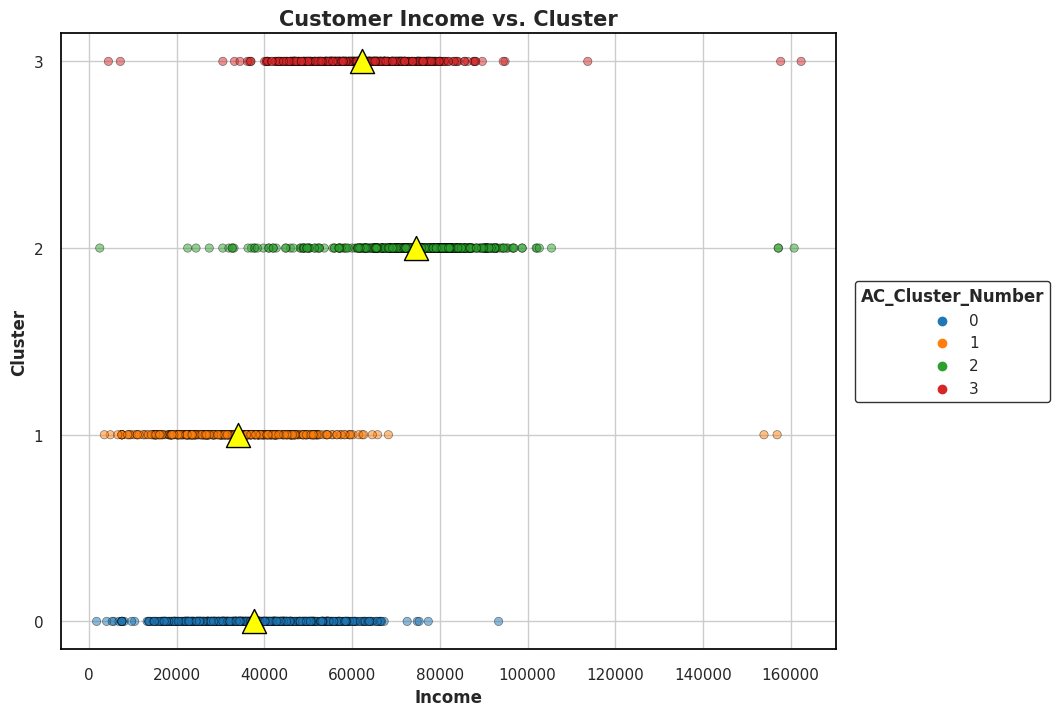

In [76]:
plt.figure(figsize=(10, 6))

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 8))  # Optional

sns.scatterplot(data=segmentation_df, x='Income', y='AC_Cluster_Number', hue='AC_Cluster_Number', alpha=0.5,palette='tab10',edgecolor='black')

# Adding the legend to the plot

legend = plt.legend(title="AC_Cluster_Number",fancybox=True,loc='center',bbox_to_anchor=(1.15,0.5),frameon=True)
legend.get_title().set_fontweight("bold")
legend.get_frame().set_edgecolor('black')

plt.xlabel('Income',fontweight='bold',size=12)
plt.ylabel('Cluster',fontweight='bold',size=12)
plt.title('Customer Income vs. Cluster',fontweight='bold',size=15)

# Modify the spines to add a black border
for spine in ax.spines.values():
    spine.set_edgecolor('black')

# Set y-axis ticks to integer values
plt.yticks(range(len(segmentation_df['AC_Cluster_Number'].unique())), labels=range(len(segmentation_df['AC_Cluster_Number'].unique())))



# Calculate average income for each cluster
average_incomes = segmentation_df.groupby('AC_Cluster_Number')['Income'].mean()

# Plot triangles for average income
for cluster, avg_income in average_incomes.items():
    plt.scatter(avg_income, cluster, marker='^', s=300, color='yellow', edgecolors='black', zorder=3)

plt.show()

print()
print()

- Average income highlighted by ***`Yellow Triangles`***
- As can be seen in the plot below, ***`Cluster 2`*** and ***`Cluster 3`*** have higher average ncomes

#### 11.2.3 Customer Education Level v/s Clusters

<Figure size 1000x600 with 0 Axes>

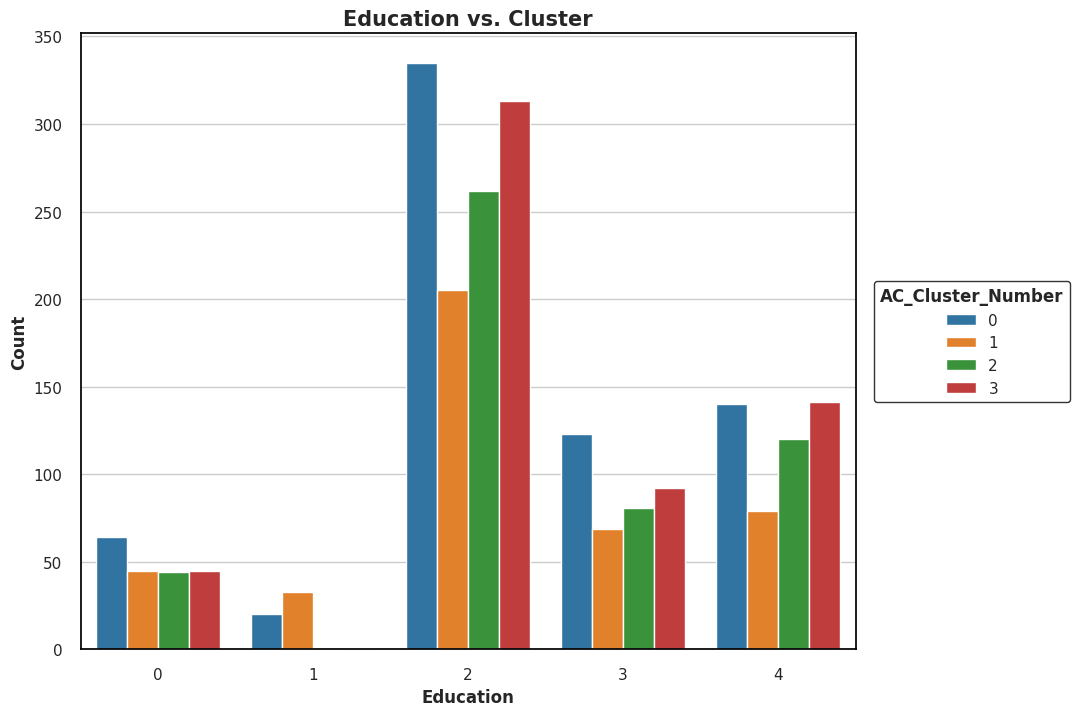

In [77]:
plt.figure(figsize=(10, 6))

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 8))  # Optional

# Create a countplot for Customer Age
sns.countplot(data=segmentation_df, x='Education', hue='AC_Cluster_Number', palette='tab10')

# Adding the legend to the plot
legend = plt.legend(title="AC_Cluster_Number", fancybox=True, loc='center', bbox_to_anchor=(1.15, 0.5), frameon=True)
legend.get_title().set_fontweight("bold")
legend.get_frame().set_edgecolor('black')

plt.xlabel('Education', fontweight='bold', size=12)
plt.ylabel('Count', fontweight='bold', size=12)
plt.title('Education vs. Cluster', fontweight='bold', size=15)

# Modify the spines to add a black border
for spine in ax.spines.values():
    spine.set_edgecolor('black')

plt.show()

- For Education Code = 1 (`Basic`), there are no members from Cluster 2 and Cluster 3

- For context, education codes are as follows -
> '2n Cycle': 0 <br>
> 'Basic': 1 <br>
> 'Graduation': 2 <br>
> 'Master': 3 <br>
> 'PhD': 4 <br>

#### 11.2.4 Amount Spent by Each Cluster on Different Products

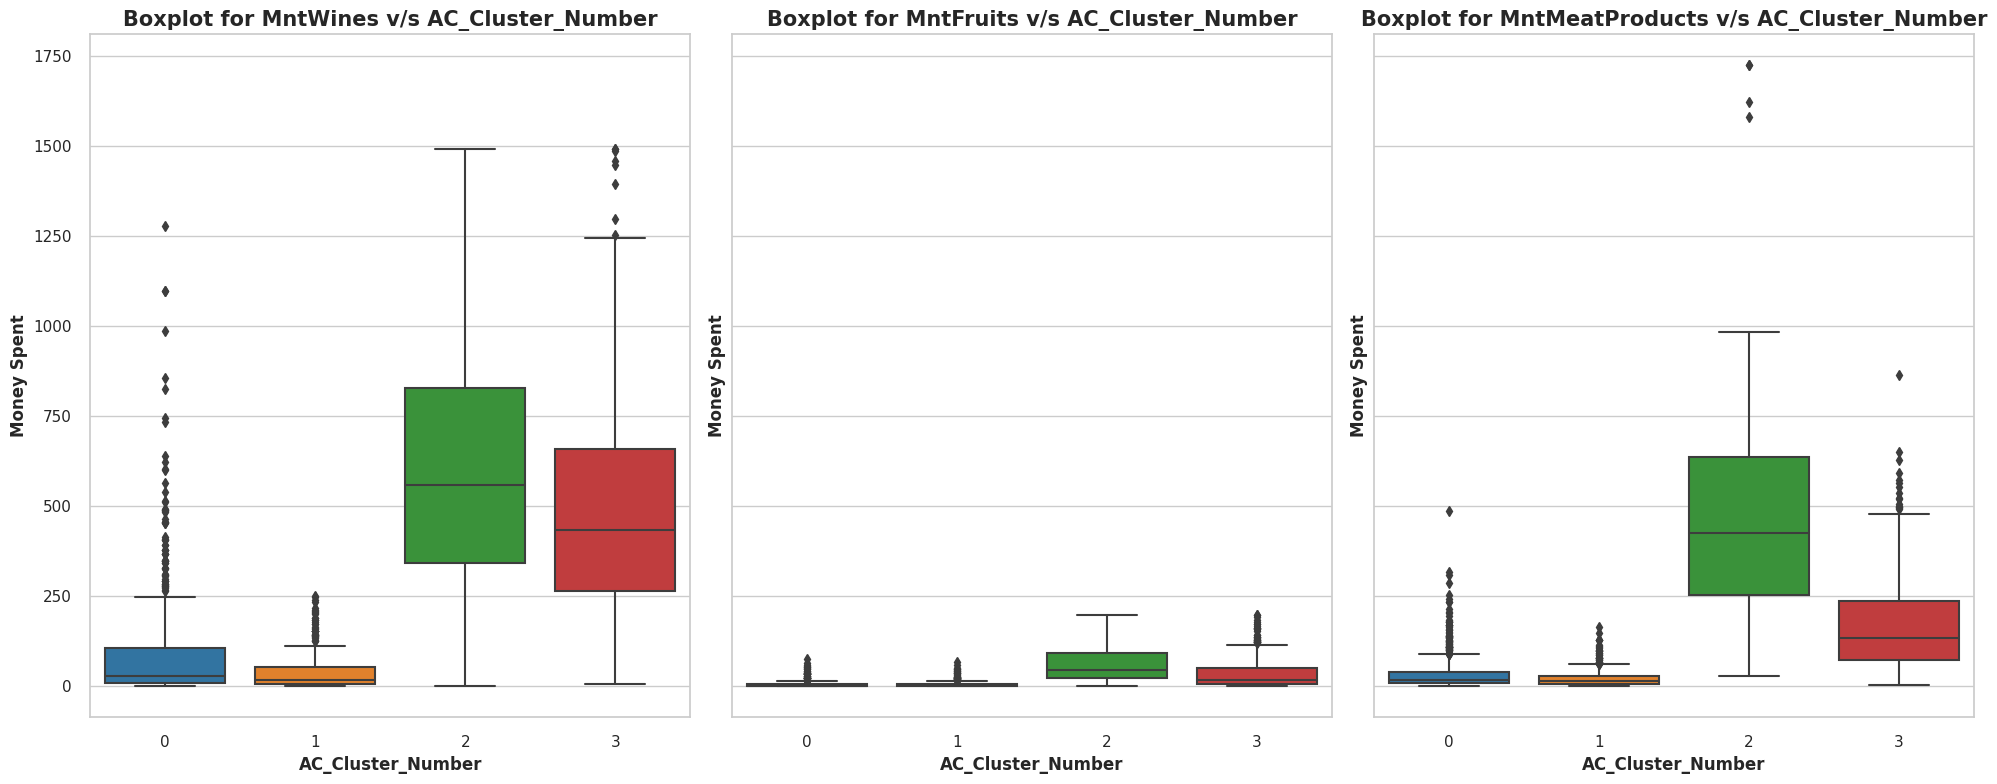

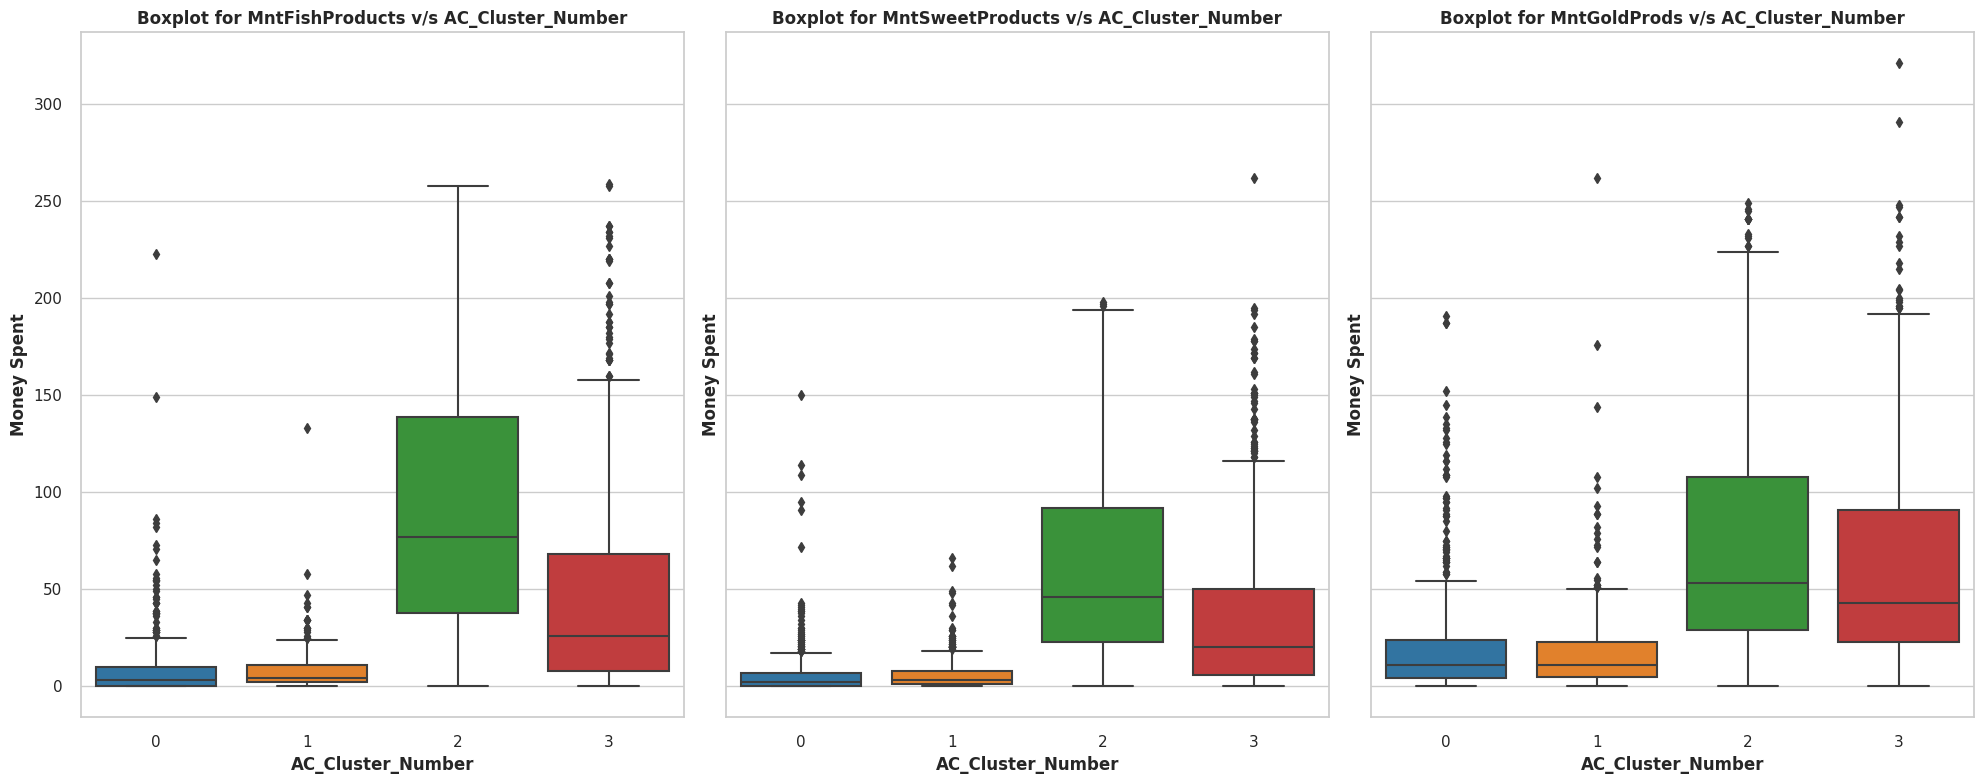

In [78]:
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True) # Adjust figsize as needed

# Iterate over each product category
for i, product in enumerate(['MntWines', 'MntFruits', 'MntMeatProducts']):
    # Create boxplots for each cluster
    sns.boxplot(ax=axes[i], x='AC_Cluster_Number', y=product, data=segmentation_df,palette='tab10')
    axes[i].set_title(f'Boxplot for {product} v/s AC_Cluster_Number',fontweight='bold',size=15)
    axes[i].set_xlabel('AC_Cluster_Number',fontweight='bold',size=12)
    axes[i].set_ylabel('Money Spent',fontweight='bold',size=12)


# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

print()
print()

sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharey=True) # Adjust figsize as needed

# Iterate over each product category
for i, product in enumerate(['MntFishProducts', 'MntSweetProducts','MntGoldProds']):
    # Create boxplots for each cluster
    sns.boxplot(ax=axes[i], x='AC_Cluster_Number', y=product, data=segmentation_df,palette='tab10')
    axes[i].set_title(f'Boxplot for {product} v/s AC_Cluster_Number',fontweight='bold',size=12)
    axes[i].set_xlabel('AC_Cluster_Number',fontweight='bold',size=12)
    axes[i].set_ylabel('Money Spent',fontweight='bold',size=12)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


- Customers in **`Cluster 2`** spend the most when it comes to Wines, Meat Products, Fish, Gold Products & Sweets, and are the highest spenders overall

- Customers in **`Cluster 0`** & **`CLuster 1`** spend tend to spend equally and relatively less in all categories

#### 11.2.5 Preferred Purchase Channel

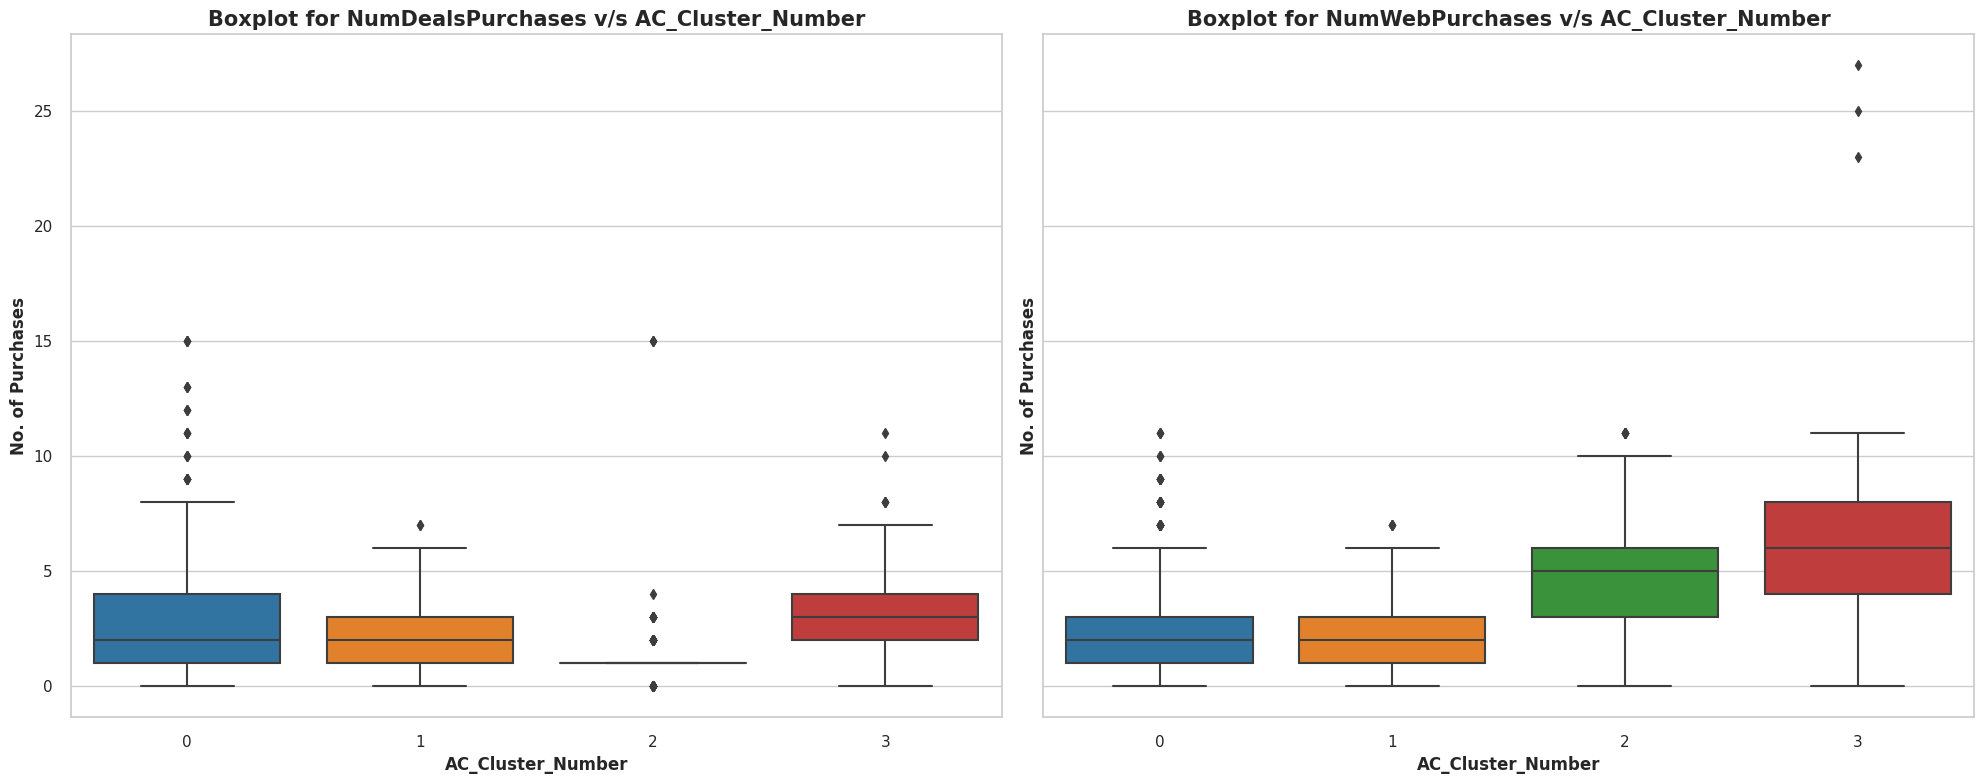

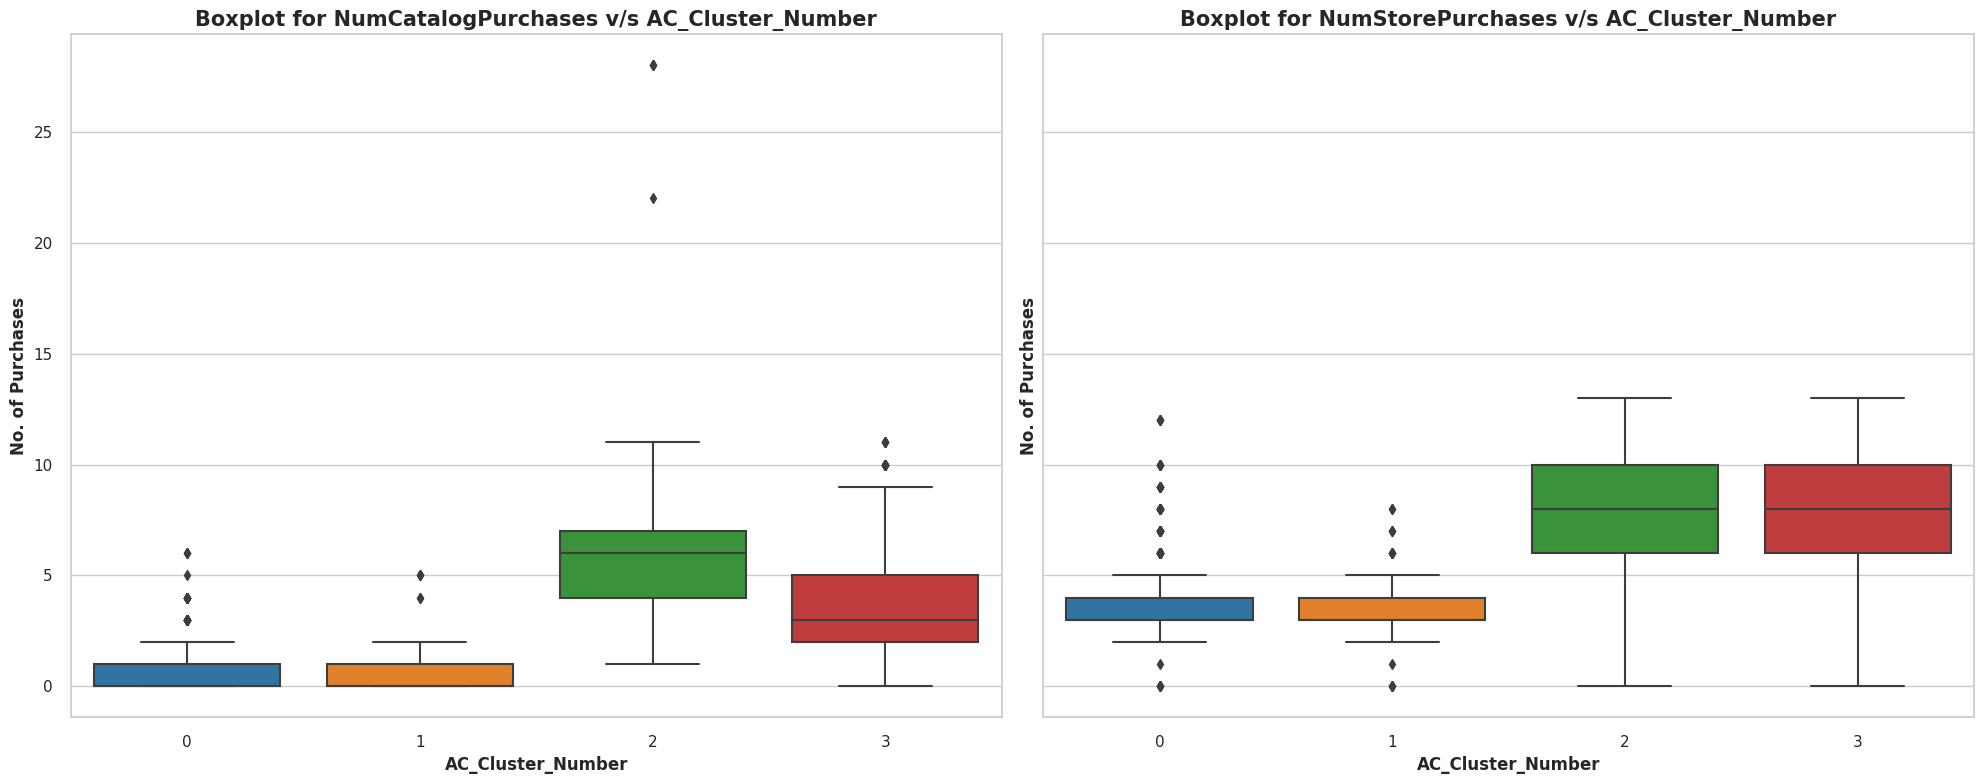

In [79]:
sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True) # Adjust figsize as needed

# Iterate over each product category
for i, product in enumerate(['NumDealsPurchases', 'NumWebPurchases']):
    # Create boxplots for each cluster
    sns.boxplot(ax=axes[i], x='AC_Cluster_Number', y=product, data=segmentation_df,palette='tab10')
    axes[i].set_title(f'Boxplot for {product} v/s AC_Cluster_Number',fontweight='bold',size=15)
    axes[i].set_xlabel('AC_Cluster_Number',fontweight='bold',size=12)
    axes[i].set_ylabel('No. of Purchases',fontweight='bold',size=12)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

print()
print()

sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True) # Adjust figsize as needed

# Iterate over each product category
for i, product in enumerate(['NumCatalogPurchases', 'NumStorePurchases']):
    # Create boxplots for each cluster
    sns.boxplot(ax=axes[i], x='AC_Cluster_Number', y=product, data=segmentation_df,palette='tab10')
    axes[i].set_title(f'Boxplot for {product} v/s AC_Cluster_Number',fontweight='bold',size=15)
    axes[i].set_xlabel('AC_Cluster_Number',fontweight='bold',size=12)
    axes[i].set_ylabel('No. of Purchases',fontweight='bold',size=12)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


- Customers in **`Cluster 2`** tend to avoid Deals Purchases

- Customers in **`Cluster 0`** & **`CLuster 1`** tend to avoid Catalog Purchases

- For the company as a whole, its customers from Cluster 3

### 11.3 Segmentation & Profiling using Jointplots

#### 11.3.1 Customer_Age, Education, Relationship Status v/s Cluster Number

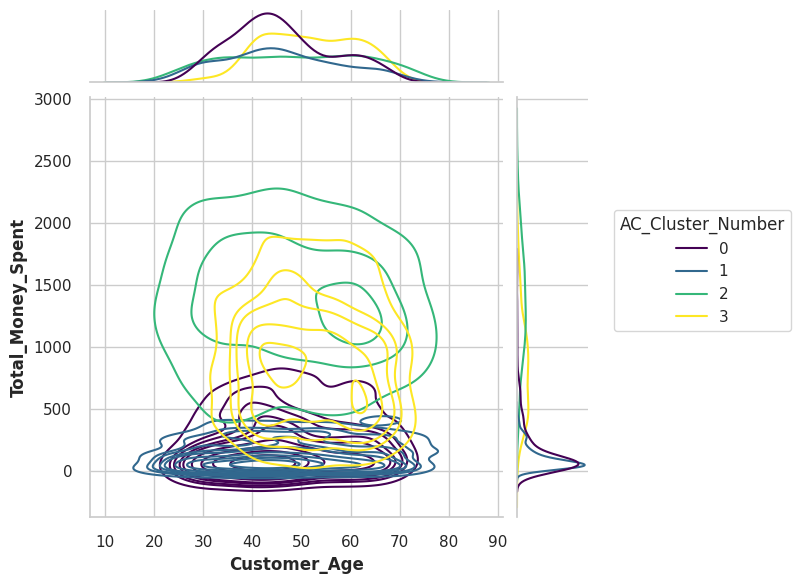

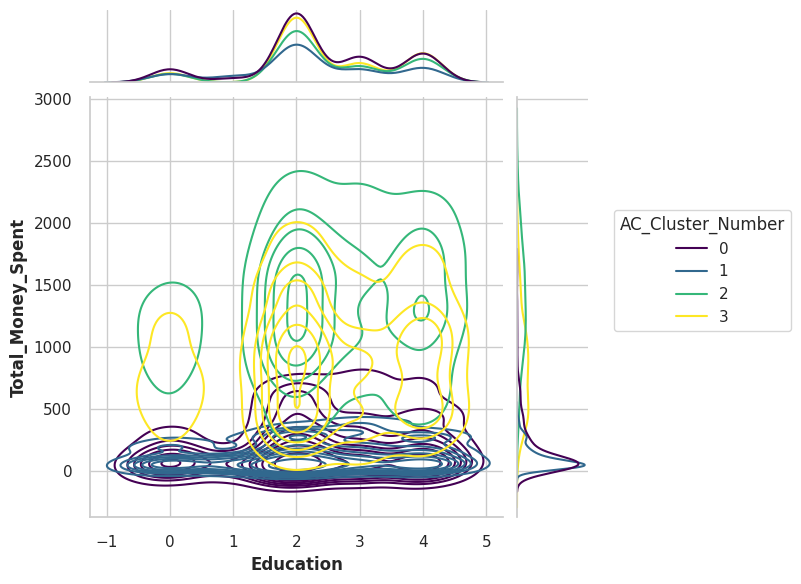

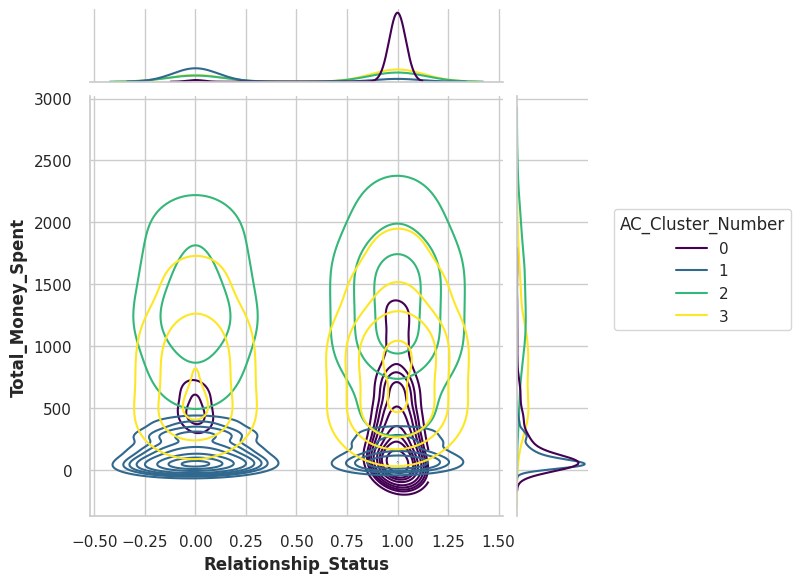

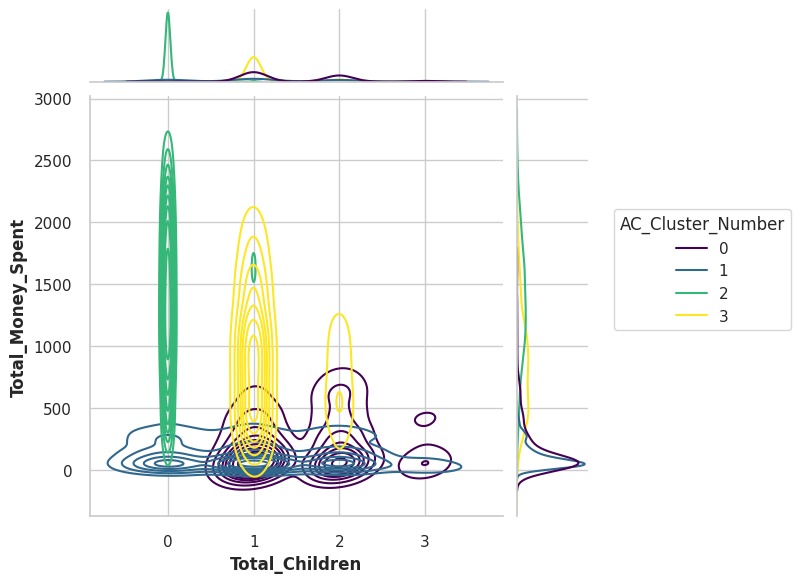

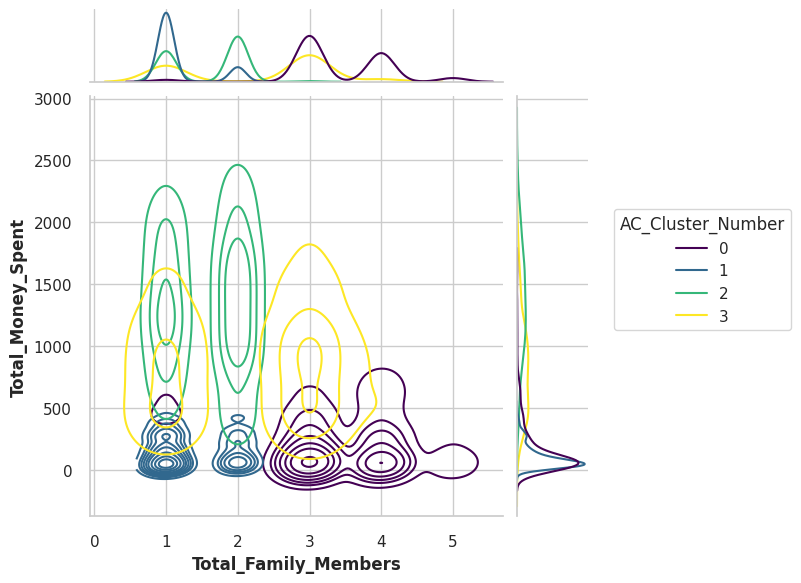

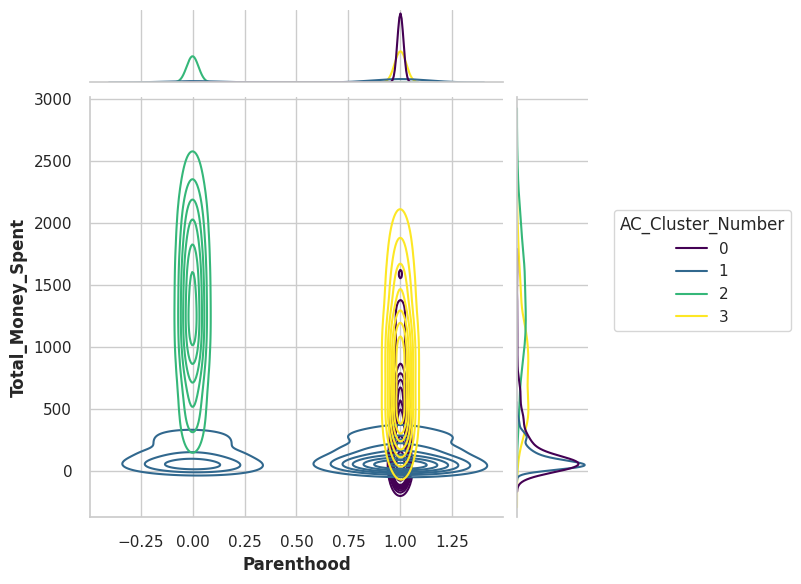

In [80]:
main_parameters = ["Customer_Age","Education","Relationship_Status"]

for i in main_parameters:
  # Create the jointplot and get the JointGrid object
  g = sns.jointplot(x=i, y="Total_Money_Spent", data=segmentation_df, hue="AC_Cluster_Number", kind="kde", palette="viridis")
  plt.ylabel('Total_Money_Spent',fontweight='bold',size=12)
  plt.xlabel(i,fontweight='bold',size=12)
  # Access the legend already created by Seaborn
  leg = g.ax_joint.get_legend()

  # If a legend exists, set its location and frame
  if leg:
      leg.set_bbox_to_anchor((1.25, 0.75))
      leg._loc = 2  # This sets the location to the upper left corner of the bbox
      leg.set_frame_on(True)  # This ensures that the legend has a box around it

  # Draw the plot
  plt.show()

  print()
  print()


main_parameters = ["Total_Children", "Total_Family_Members", "Parenthood"]

for i in main_parameters:
  # Create the jointplot and get the JointGrid object
  g = sns.jointplot(x=i, y="Total_Money_Spent", data=segmentation_df, hue="AC_Cluster_Number", kind="kde", palette="viridis")
  plt.ylabel('Total_Money_Spent',fontweight='bold',size=12)
  plt.xlabel(i,fontweight='bold',size=12)
  # Access the legend already created by Seaborn
  leg = g.ax_joint.get_legend()

  # If a legend exists, set its location and frame
  if leg:
      leg.set_bbox_to_anchor((1.25, 0.75))
      leg._loc = 2  # This sets the location to the upper left corner of the bbox
      leg.set_frame_on(True)  # This ensures that the legend has a box around it

  # Adjust overall figure size if needed

  # Draw the plot
  plt.show()

  print()
  print()

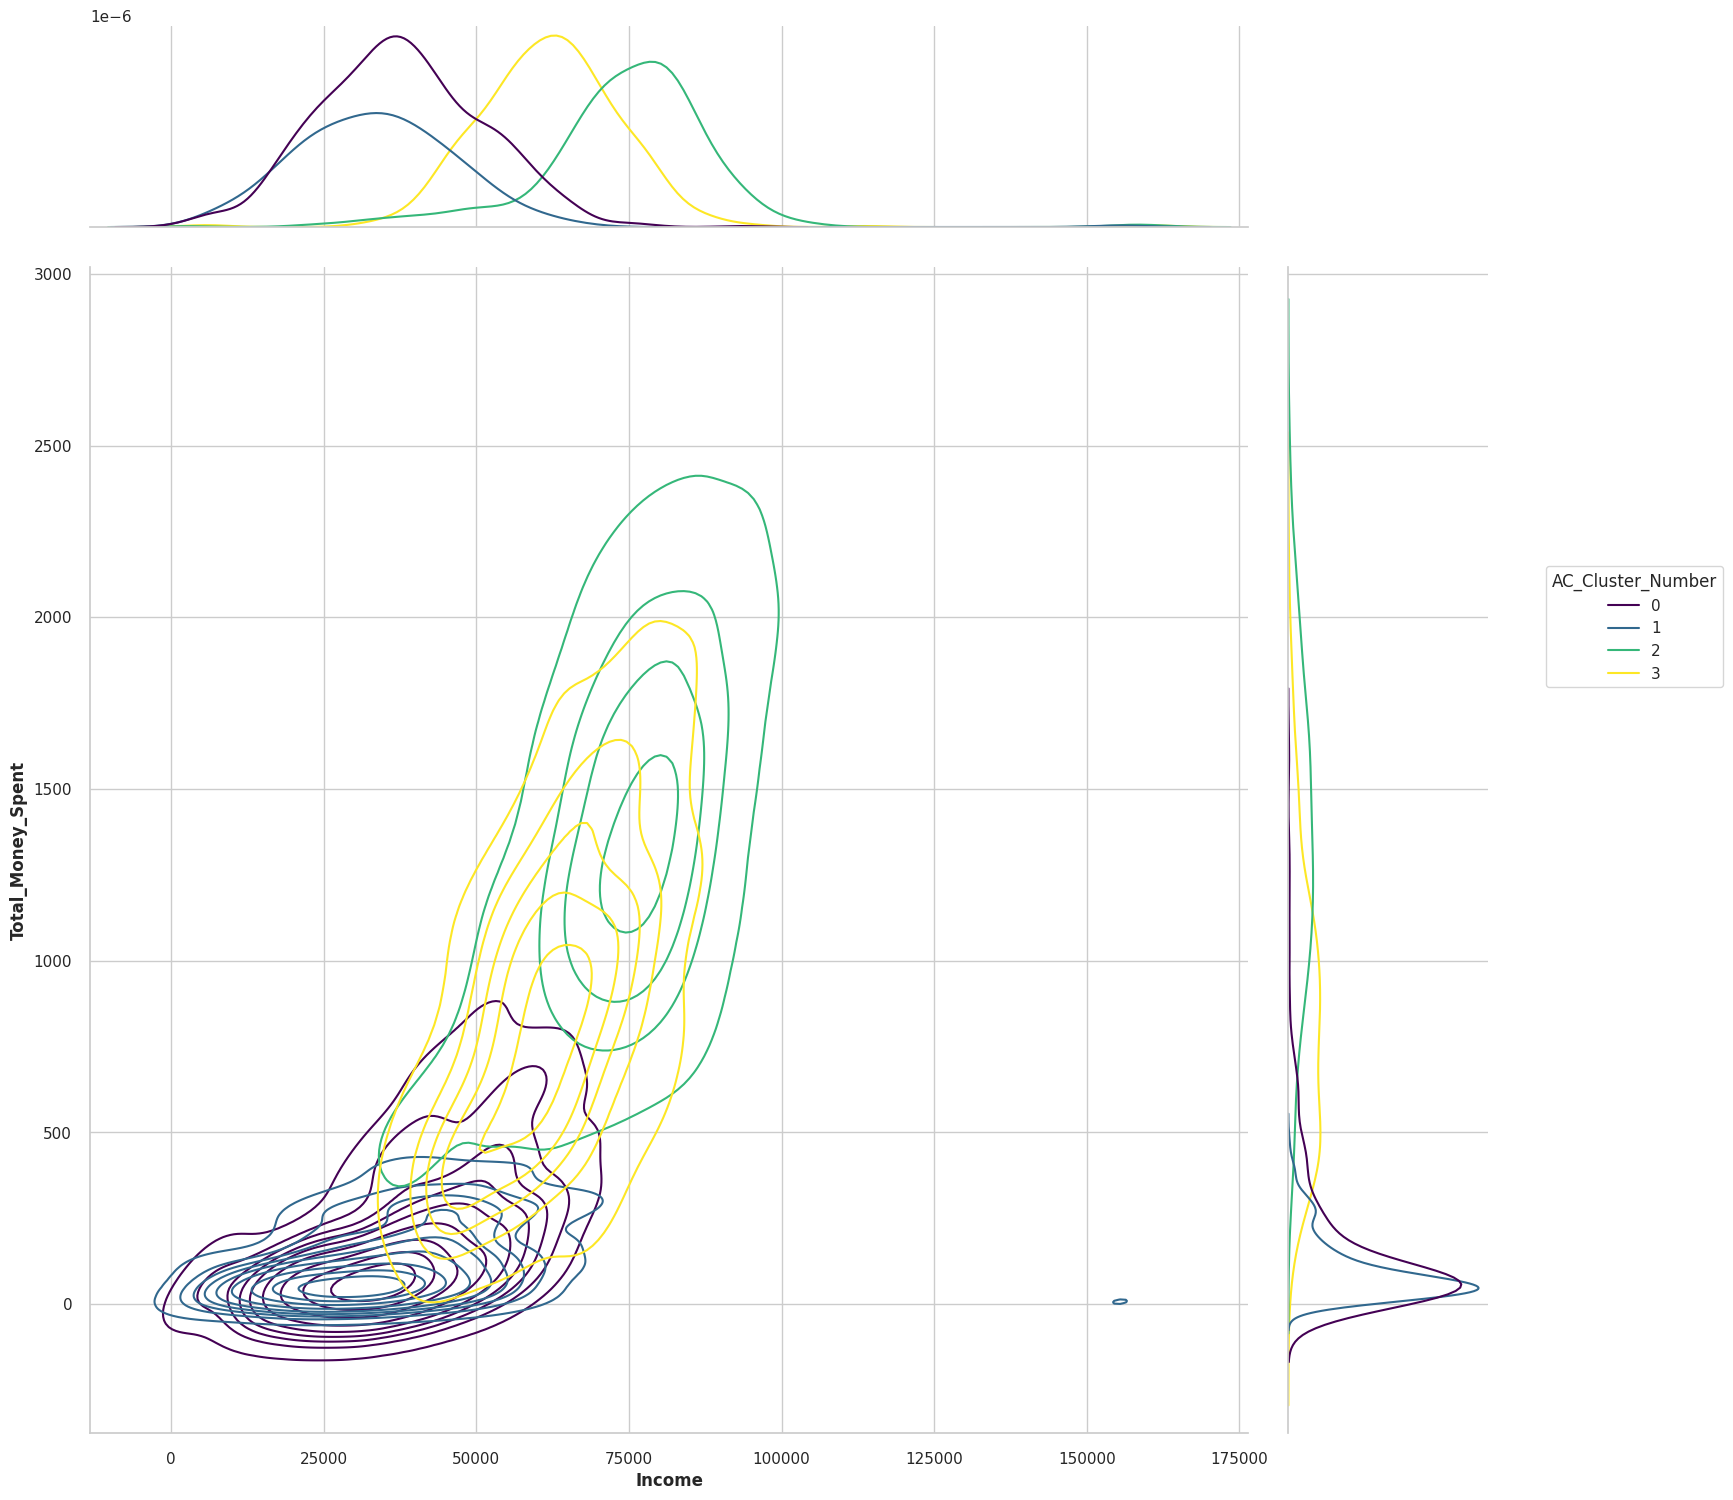

In [81]:
# Create the jointplot and get the JointGrid object
g = sns.jointplot(x='Income', y="Total_Money_Spent", data=segmentation_df, hue="AC_Cluster_Number", kind="kde", palette="viridis",height=15)
plt.ylabel('Total_Money_Spent',fontweight='bold',size=12)
plt.xlabel('Income',fontweight='bold',size=12)

# Access the legend already created by Seaborn
leg = g.ax_joint.get_legend()

# If a legend exists, set its location and frame
if leg:
    leg.set_bbox_to_anchor((1.25, 0.75))
    leg._loc = 2  # This sets the location to the upper left corner of the bbox
    leg.set_frame_on(True)  # This ensures that the legend has a box around it

# Adjust overall figure size if needed

# Draw the plot
plt.show()
print()
print()

## 12 Conclusion



### Cluster 0

*   ***`Extremely High Chance`*** that they are Parents
*   ***`High Chance`*** that they have a partner
*   ***`High Chance`*** that they have either 1 or 2 children
*   ***`High Chance`*** that their Education Level is either "Graduation", "Master" or "PhD"
*   ***`High Chance Income`*** is between \$20,000 and \$60,000


### Cluster 1

*   ***`Good Chance`*** that they are not be parents
*   ***`High Chance`*** they do not have a partner
*   ***`High Chance`*** that their Income is between \$20,000 and \$60,000
*   ***`High Chance`*** that their Education level is “Graduation”


### Cluster 2

*   ***`Extremely High Chance`*** that they are not parents
*   ***`High Chance`*** that their Income is between \$55,000 and \$100,000
*   ***`High Chance`*** that their Education level is not “Basic”, and is “Graduation”


### Cluster 3

*   ***`Extremely High Chance`*** that they are parents
*   ***`High Chance`*** that their Income is between \$40,000 and \$80,000
*   ***`Good Chance`*** that their Education level is “Graduation”, “Master” or “Phd”, and is almost definitely not “Basic”
